<h1 style="color: #8490ff; text-align: center;"><strong>Annamalai University</strong></h1>
<p style="text-align: center;"><em><strong>Department: Computer Science and Engineering (AI & ML)</strong></em></p>
<hr />
<h2 style="color: #ff0000; text-align: center;"><strong>Predictive Maintenance</strong></h2>
<h3 style="text-align: center;"><strong>A Final Year Project</strong></h3>
<h3 style="text-align: left;">Done by :</h3>
<ul>
<li>Kamalkumar. V. P</li>
<li>Yogesh. T</li>
<li>Navaneetha Kannan. A</li>
<li>Vedakeerthi. A</li>
</ul>
<h3>Under the Guidance of :</h3>
<ul>
    <li><p>Dr. B. KIRUBAGARI</p>
        <p><strong>ASSOCIATE PROFESSOR</strong></p></li>
    <li><p>Dr. A. PUNITHA</p>
        <p><strong>ASSOCIATE PROFESSOR</strong></p></li>

</ul>

### Dataset Validation

In [1]:
#Import the required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

#### Detail about the dataset



The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the project is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
\
1)	unit number \
2)	time, in cycles \
3)	operational setting 1 \
4)	operational setting 2 \
5)	operational setting 3 \
6)	sensor measurement  1 \
7)	sensor measurement  2 \
... \
26)	sensor measurement  26 

In [3]:
#Import the dataset
train_data = pd.read_csv('Datasets/train_FD001.txt',sep='\s+',header=None)
test_data = pd.read_csv('Datasets/test_FD001.txt',sep='\s+',header=None)
y_test = pd.read_csv('Datasets/RUL_FD001.txt',sep='\s+',header=None,names=['RUL'])

In [4]:
train_data.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

      10      11       12       13   14     15      16       17       18  \
0  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02  8138.62   
1  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07  8131.49   
2  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03  8133.23   
3  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08  8133.83   
4  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04  8133.80   

       19    20   21    22     23     24       25  
0  8.4195  0.03  392  2388  100.0  39.06  23.4190  
1  8.4318  0.03  392  2388  100.0  39.00  23.4236  
2  8.4178  0.03  390  2388  100.0  38.95  23.3442  
3  8.3682  0.03  392  2388  100.0  38.88  23.3739  
4  8.4294  0.03  393  2388  100.0  38.90  23.4044

In [5]:
test_data.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

      10      11       12       13   14     15      16       17       18  \
0  21.61  553.90  2388.04  9050.17  1.3  47.20  521.72  2388.03  8125.55   
1  21.61  554.85  2388.01  9054.42  1.3  47.50  522.16  2388.06  8139.62   
2  21.61  554.11  2388.05  9056.96  1.3  47.50  521.97  2388.03  8130.10   
3  21.61  554.07  2388.03  9045.29  1.3  47.28  521.38  2388.05  8132.90   
4  21.61  554.16  2388.01  9044.55  1.3  47.31  522.15  2388.03  8129.54   

       19    20   21    22     23     24       25  
0  8.4052  0.03  392  2388  100.0  38.86  23.3735  
1  8.3803  0.03  393  2388  100.0  39.02  23.3916  
2  8.4441  0.03  393  2388  100.0  39.08  23.4166  
3  8.3917  0.03  391  2388  100.0  39.00  23.3737  
4  8.4031  0.03  390  2388  100.0  38.99  23.4130

In [6]:
y_test.head()

RUL
0  112
1   98
2   69
3   82
4   91

In [7]:
#Renaming the header columns of the training and testing data
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

train_data.columns = col_names
test_data.columns = col_names

In [8]:
train_data.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11  \
0  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47   
1  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49   
2  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27   
3  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13   
4  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28   

     s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  
0  521.66  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  
1  522.28  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  
2  522.42  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  
3  522.86  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  
4  522.19  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044

In [9]:
test_data.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11  \
0  1585.29  1398.21  14.62  21.61  553.90  2388.04  9050.17   1.3  47.20   
1  1588.45  1395.42  14.62  21.61  554.85  2388.01  9054.42   1.3  47.50   
2  1586.94  1401.34  14.62  21.61  554.11  2388.05  9056.96   1.3  47.50   
3  1584.12  1406.42  14.62  21.61  554.07  2388.03  9045.29   1.3  47.28   
4  1587.19  1401.92  14.62  21.61  554.16  2388.01  9044.55   1.3  47.31   

     s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  
0  521.72  2388.03  8125.55  8.4052  0.03   392  2388  100.0  38.86  23.3735  
1  522.16  2388.06  8139.62  8.3803  0.03   393  2388  100.0  39.02  23.3916  
2  521.97  2388.03  8130.10  8.4441  0.03   393  2388  100.0  39.08  23.4166  
3  521.38  2388.05  8132.90  8.3917  0.03   391  2388  100.0  39.00  23.3737  
4  522.15  2388.03  8129.54  8.4031  0.03   390  2388  100.0  38.99  23.4130

<center> RUL = Max Life Time Cycle of Engine - Current Time Cycle </center>

In [10]:
#Adding RUL feature
def add_remaining_useful_life(df):
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [11]:
train_data = add_remaining_useful_life(train_data)
train_data

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11  \
0      1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47   
1      1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49   
2      1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27   
3      1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13   
4      1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28   
...        ...      ...    ...    ...     ...      ...      ...   ...    ...   
20626  1597.98  1428.63  14.62  21.61  551.43  2388.19  9065.52   1.3  48.07   
20627  1604.50  1433.58  14.62  21.61  550.86  2388.23  9065.11   1.3  48.04   
20628  1602.46  1428.18  14.62  21.61  550.94  2388.24  9065.90   1.3  48.09   
20629  1605.26  1426.53  14.62  21.61  550.68  2388.25  9073.72   1.3  48.39   
20630  1600.38  1432.14  14.62  21.61  550.79  2388.26  9061.48   1.3  48.20   

         s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20  \
0      521.66  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06   
1      522.28  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00   
2      522.42  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95   
3      522.86  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88   
4      522.19  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90   
...       ...      ...      ...     ...   ...   ...   ...    ...    ...   
20626  519.49  2388.26  8137.60  8.4956  0.03   397  2388  100.0  38.49   
20627  519.68  2388.22  8136.50  8.5139  0.03   395  2388  100.0  38.30   
20628  520.01  2388.24  8141.05  8.5646  0.03   398  2388  100.0  38.44   
20629  519.67  2388.23  8139.29  8.5389  0.03   395  2388  100.0  38.29   
20630  519.30  2388.26  8137.33  8.5036  0.03   396  2388  100.0  38.37   

          s_21  RUL  
0      23.4190  191  
1      23.4236  190  
2      23.3442  189  
3      23.3739  188  
4      23.4044  187  
...        ...  ...  
20626  22.9735    4  
20627  23.1594    3  
20628  22.9333    2  
20629  23.0640    1  
20630  23.0522    0  

[20631 rows x 27 columns]

### Data Exploration

#### Data Insights

In [12]:
train_data.describe()

unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            s_1           s_2           s_3           s_4           s_5  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01   

                s_6           s_7           s_8           s_9     s_10  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      21.609803    553.367711   2388.096652   9065.242941      1.3   
std        0.001389      0.885092      0.070985     22.082880      0.0   
min       21.600000    549.850000   2387.900000   9021.730000      1.3   
25%       21.610000    552.810000   2388.050000   9053.100000      1.3   
50%       21.610000    553.440000   2388.090000   9060.660000      1.3   
75%       21.610000    554.010000   2388.140000   9069.420000      1.3   
max       21.610000    556.060000   2388.560000   9244.590000      1.3   

               s_11          s_12          s_13          s_14          s_15  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      47.541168    521.413470   2388.096152   8143.752722      8.442146   
std        0.267087      0.737553      0.071919     19.076176      0.037505   
min       46.850000    518.690000   2387.880000   8099.940000      8.324900   
25%       47.350000    520.960000   2388.040000   8133.245000      8.414900   
50%       47.510000    521.480000   2388.090000   8140.540000      8.438900   
75%       47.700000    521.950000   2388.140000   8148.310000      8.465600   
max       48.530000    523.380000   2388.560000   8293.720000      8.584800   

               s_16          s_17     s_18     s_19          s_20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.387812e-17      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

               s_21           RUL  
count  20631.000000  20631.000000  
mean      23.289705    107.807862  
std        0.108251     68.880990  
min       22.894200      0.000000  
25%       23.221800     51.000000  
50%       23.297900    103.000000  
75%       23.366800    155.000000  
max       23.618400    361.000000

Observation: We can see that `setting_3`, `s_1`, `s_10`, `s_18` and `s_19` have zero standard deviation, which means that the engine values are remaining the same for the cycle for now, and so we cannot consider these same values to provide insights about the engine, thus we can remove it both from the training data as well as from the testing data.

In [13]:
train_data.drop(['setting_3','s_1','s_10','s_18','s_19'],axis=1,inplace=True)
test_data=test_data[train_data.columns.drop('RUL')]

In [14]:
train_data.head()

unit_nr  time_cycles  setting_1  setting_2     s_2      s_3      s_4  \
0        1            1    -0.0007    -0.0004  641.82  1589.70  1400.60   
1        1            2     0.0019    -0.0003  642.15  1591.82  1403.14   
2        1            3    -0.0043     0.0003  642.35  1587.99  1404.20   
3        1            4     0.0007     0.0000  642.35  1582.79  1401.87   
4        1            5    -0.0019    -0.0002  642.37  1582.85  1406.22   

     s_5    s_6     s_7      s_8      s_9   s_11    s_12     s_13     s_14  \
0  14.62  21.61  554.36  2388.06  9046.19  47.47  521.66  2388.02  8138.62   
1  14.62  21.61  553.75  2388.04  9044.07  47.49  522.28  2388.07  8131.49   
2  14.62  21.61  554.26  2388.08  9052.94  47.27  522.42  2388.03  8133.23   
3  14.62  21.61  554.45  2388.11  9049.48  47.13  522.86  2388.08  8133.83   
4  14.62  21.61  554.00  2388.06  9055.15  47.28  522.19  2388.04  8133.80   

     s_15  s_16  s_17   s_20     s_21  RUL  
0  8.4195  0.03   392  39.06  23.4190  191  
1  8.4318  0.03   392  39.00  23.4236  190  
2  8.4178  0.03   390  38.95  23.3442  189  
3  8.3682  0.03   392  38.88  23.3739  188  
4  8.4294  0.03   393  38.90  23.4044  187

In [15]:
test_data.head()

unit_nr  time_cycles  setting_1  setting_2     s_2      s_3      s_4  \
0        1            1     0.0023     0.0003  643.02  1585.29  1398.21   
1        1            2    -0.0027    -0.0003  641.71  1588.45  1395.42   
2        1            3     0.0003     0.0001  642.46  1586.94  1401.34   
3        1            4     0.0042     0.0000  642.44  1584.12  1406.42   
4        1            5     0.0014     0.0000  642.51  1587.19  1401.92   

     s_5    s_6     s_7      s_8      s_9   s_11    s_12     s_13     s_14  \
0  14.62  21.61  553.90  2388.04  9050.17  47.20  521.72  2388.03  8125.55   
1  14.62  21.61  554.85  2388.01  9054.42  47.50  522.16  2388.06  8139.62   
2  14.62  21.61  554.11  2388.05  9056.96  47.50  521.97  2388.03  8130.10   
3  14.62  21.61  554.07  2388.03  9045.29  47.28  521.38  2388.05  8132.90   
4  14.62  21.61  554.16  2388.01  9044.55  47.31  522.15  2388.03  8129.54   

     s_15  s_16  s_17   s_20     s_21  
0  8.4052  0.03   392  38.86  23.3735  
1  8.3803  0.03   393  39.02  23.3916  
2  8.4441  0.03   393  39.08  23.4166  
3  8.3917  0.03   391  39.00  23.3737  
4  8.4031  0.03   390  38.99  23.4130

#### Looking for null values

In [16]:
for i in train_data.columns:
    print(f'The number of null values present in {i} is {train_data[i].isna().sum()} ')

The number of null values present in unit_nr is 0 
The number of null values present in time_cycles is 0 
The number of null values present in setting_1 is 0 
The number of null values present in setting_2 is 0 
The number of null values present in s_2 is 0 
The number of null values present in s_3 is 0 
The number of null values present in s_4 is 0 
The number of null values present in s_5 is 0 
The number of null values present in s_6 is 0 
The number of null values present in s_7 is 0 
The number of null values present in s_8 is 0 
The number of null values present in s_9 is 0 
The number of null values present in s_11 is 0 
The number of null values present in s_12 is 0 
The number of null values present in s_13 is 0 
The number of null values present in s_14 is 0 
The number of null values present in s_15 is 0 
The number of null values present in s_16 is 0 
The number of null values present in s_17 is 0 
The number of null values present in s_20 is 0 
The number of null values pr

#### Treating Duplicate values

In [17]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

#### Final dataset

In [18]:
train_data

unit_nr  time_cycles  setting_1  setting_2     s_2      s_3      s_4  \
0            1            1    -0.0007    -0.0004  641.82  1589.70  1400.60   
1            1            2     0.0019    -0.0003  642.15  1591.82  1403.14   
2            1            3    -0.0043     0.0003  642.35  1587.99  1404.20   
3            1            4     0.0007     0.0000  642.35  1582.79  1401.87   
4            1            5    -0.0019    -0.0002  642.37  1582.85  1406.22   
...        ...          ...        ...        ...     ...      ...      ...   
20626      100          196    -0.0004    -0.0003  643.49  1597.98  1428.63   
20627      100          197    -0.0016    -0.0005  643.54  1604.50  1433.58   
20628      100          198     0.0004     0.0000  643.42  1602.46  1428.18   
20629      100          199    -0.0011     0.0003  643.23  1605.26  1426.53   
20630      100          200    -0.0032    -0.0005  643.85  1600.38  1432.14   

         s_5    s_6     s_7      s_8      s_9   s_11    s_12     s_13  \
0      14.62  21.61  554.36  2388.06  9046.19  47.47  521.66  2388.02   
1      14.62  21.61  553.75  2388.04  9044.07  47.49  522.28  2388.07   
2      14.62  21.61  554.26  2388.08  9052.94  47.27  522.42  2388.03   
3      14.62  21.61  554.45  2388.11  9049.48  47.13  522.86  2388.08   
4      14.62  21.61  554.00  2388.06  9055.15  47.28  522.19  2388.04   
...      ...    ...     ...      ...      ...    ...     ...      ...   
20626  14.62  21.61  551.43  2388.19  9065.52  48.07  519.49  2388.26   
20627  14.62  21.61  550.86  2388.23  9065.11  48.04  519.68  2388.22   
20628  14.62  21.61  550.94  2388.24  9065.90  48.09  520.01  2388.24   
20629  14.62  21.61  550.68  2388.25  9073.72  48.39  519.67  2388.23   
20630  14.62  21.61  550.79  2388.26  9061.48  48.20  519.30  2388.26   

          s_14    s_15  s_16  s_17   s_20     s_21  RUL  
0      8138.62  8.4195  0.03   392  39.06  23.4190  191  
1      8131.49  8.4318  0.03   392  39.00  23.4236  190  
2      8133.23  8.4178  0.03   390  38.95  23.3442  189  
3      8133.83  8.3682  0.03   392  38.88  23.3739  188  
4      8133.80  8.4294  0.03   393  38.90  23.4044  187  
...        ...     ...   ...   ...    ...      ...  ...  
20626  8137.60  8.4956  0.03   397  38.49  22.9735    4  
20627  8136.50  8.5139  0.03   395  38.30  23.1594    3  
20628  8141.05  8.5646  0.03   398  38.44  22.9333    2  
20629  8139.29  8.5389  0.03   395  38.29  23.0640    1  
20630  8137.33  8.5036  0.03   396  38.37  23.0522    0  

[20631 rows x 22 columns]

In [19]:
test_data

unit_nr  time_cycles  setting_1  setting_2     s_2      s_3      s_4  \
0            1            1     0.0023     0.0003  643.02  1585.29  1398.21   
1            1            2    -0.0027    -0.0003  641.71  1588.45  1395.42   
2            1            3     0.0003     0.0001  642.46  1586.94  1401.34   
3            1            4     0.0042     0.0000  642.44  1584.12  1406.42   
4            1            5     0.0014     0.0000  642.51  1587.19  1401.92   
...        ...          ...        ...        ...     ...      ...      ...   
13091      100          194     0.0049     0.0000  643.24  1599.45  1415.79   
13092      100          195    -0.0011    -0.0001  643.22  1595.69  1422.05   
13093      100          196    -0.0006    -0.0003  643.44  1593.15  1406.82   
13094      100          197    -0.0038     0.0001  643.26  1594.99  1419.36   
13095      100          198     0.0013     0.0003  642.95  1601.62  1424.99   

         s_5    s_6     s_7      s_8      s_9   s_11    s_12     s_13  \
0      14.62  21.61  553.90  2388.04  9050.17  47.20  521.72  2388.03   
1      14.62  21.61  554.85  2388.01  9054.42  47.50  522.16  2388.06   
2      14.62  21.61  554.11  2388.05  9056.96  47.50  521.97  2388.03   
3      14.62  21.61  554.07  2388.03  9045.29  47.28  521.38  2388.05   
4      14.62  21.61  554.16  2388.01  9044.55  47.31  522.15  2388.03   
...      ...    ...     ...      ...      ...    ...     ...      ...   
13091  14.62  21.61  553.41  2388.02  9142.37  47.69  520.69  2388.00   
13092  14.62  21.61  553.22  2388.05  9140.68  47.60  521.05  2388.09   
13093  14.62  21.61  553.04  2388.11  9146.81  47.57  521.18  2388.04   
13094  14.62  21.61  553.37  2388.07  9148.85  47.61  521.33  2388.08   
13095  14.62  21.61  552.48  2388.06  9155.03  47.80  521.07  2388.05   

          s_14    s_15  s_16  s_17   s_20     s_21  
0      8125.55  8.4052  0.03   392  38.86  23.3735  
1      8139.62  8.3803  0.03   393  39.02  23.3916  
2      8130.10  8.4441  0.03   393  39.08  23.4166  
3      8132.90  8.3917  0.03   391  39.00  23.3737  
4      8129.54  8.4031  0.03   390  38.99  23.4130  
...        ...     ...   ...   ...    ...      ...  
13091  8213.28  8.4715  0.03   394  38.65  23.1974  
13092  8210.85  8.4512  0.03   395  38.57  23.2771  
13093  8217.24  8.4569  0.03   395  38.62  23.2051  
13094  8220.48  8.4711  0.03   395  38.66  23.2699  
13095  8214.64  8.4903  0.03   396  38.70  23.1855  

[13096 rows x 21 columns]

#### Data Analysis on the datasets

In [20]:
print(f'The shape of the training data : {train_data.shape}')
print(f'The shape of the testing data : {test_data.shape}')

The shape of the training data : (20631, 22)
The shape of the testing data : (13096, 21)


In [21]:
print(f'Training data have these datatypes: {set(train_data.dtypes)}')
print(f'Testing data have these datatypes: {set(test_data.dtypes)}')

Training data have these datatypes: {dtype('float64'), dtype('int64')}
Testing data have these datatypes: {dtype('float64'), dtype('int64')}


In [22]:
print(f'The unique values of the unit_nr feature: {train_data.unit_nr.unique()}')
print(f'So we have {len(train_data.unit_nr.unique())} engines data')

The unique values of the unit_nr feature: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
So we have 100 engines data


In [23]:
print(f"Let's see how much time cycles does each engine revolves",end="\n")
time_cycle_each = []
for i in range(1,101):
    print(f"Engine {i} revolves : {len(train_data.time_cycles[train_data['unit_nr']==i])} cycles")
    time_cycle_each.append(len(train_data.time_cycles[train_data['unit_nr']==i]))

Let's see how much time cycles does each engine revolves
Engine 1 revolves : 192 cycles
Engine 2 revolves : 287 cycles
Engine 3 revolves : 179 cycles
Engine 4 revolves : 189 cycles
Engine 5 revolves : 269 cycles
Engine 6 revolves : 188 cycles
Engine 7 revolves : 259 cycles
Engine 8 revolves : 150 cycles
Engine 9 revolves : 201 cycles
Engine 10 revolves : 222 cycles
Engine 11 revolves : 240 cycles
Engine 12 revolves : 170 cycles
Engine 13 revolves : 163 cycles
Engine 14 revolves : 180 cycles
Engine 15 revolves : 207 cycles
Engine 16 revolves : 209 cycles
Engine 17 revolves : 276 cycles
Engine 18 revolves : 195 cycles
Engine 19 revolves : 158 cycles
Engine 20 revolves : 234 cycles
Engine 21 revolves : 195 cycles
Engine 22 revolves : 202 cycles
Engine 23 revolves : 168 cycles
Engine 24 revolves : 147 cycles
Engine 25 revolves : 230 cycles
Engine 26 revolves : 199 cycles
Engine 27 revolves : 156 cycles
Engine 28 revolves : 165 cycles
Engine 29 revolves : 163 cycles
Engine 30 revolves : 194

In [24]:
#The same time cycle that each engine revolves for the testing data
time_cycle_each_test = []
for i in range(1,101):
    time_cycle_each_test.append(len(test_data.time_cycles[test_data['unit_nr']==i]))

### Feature Engineering

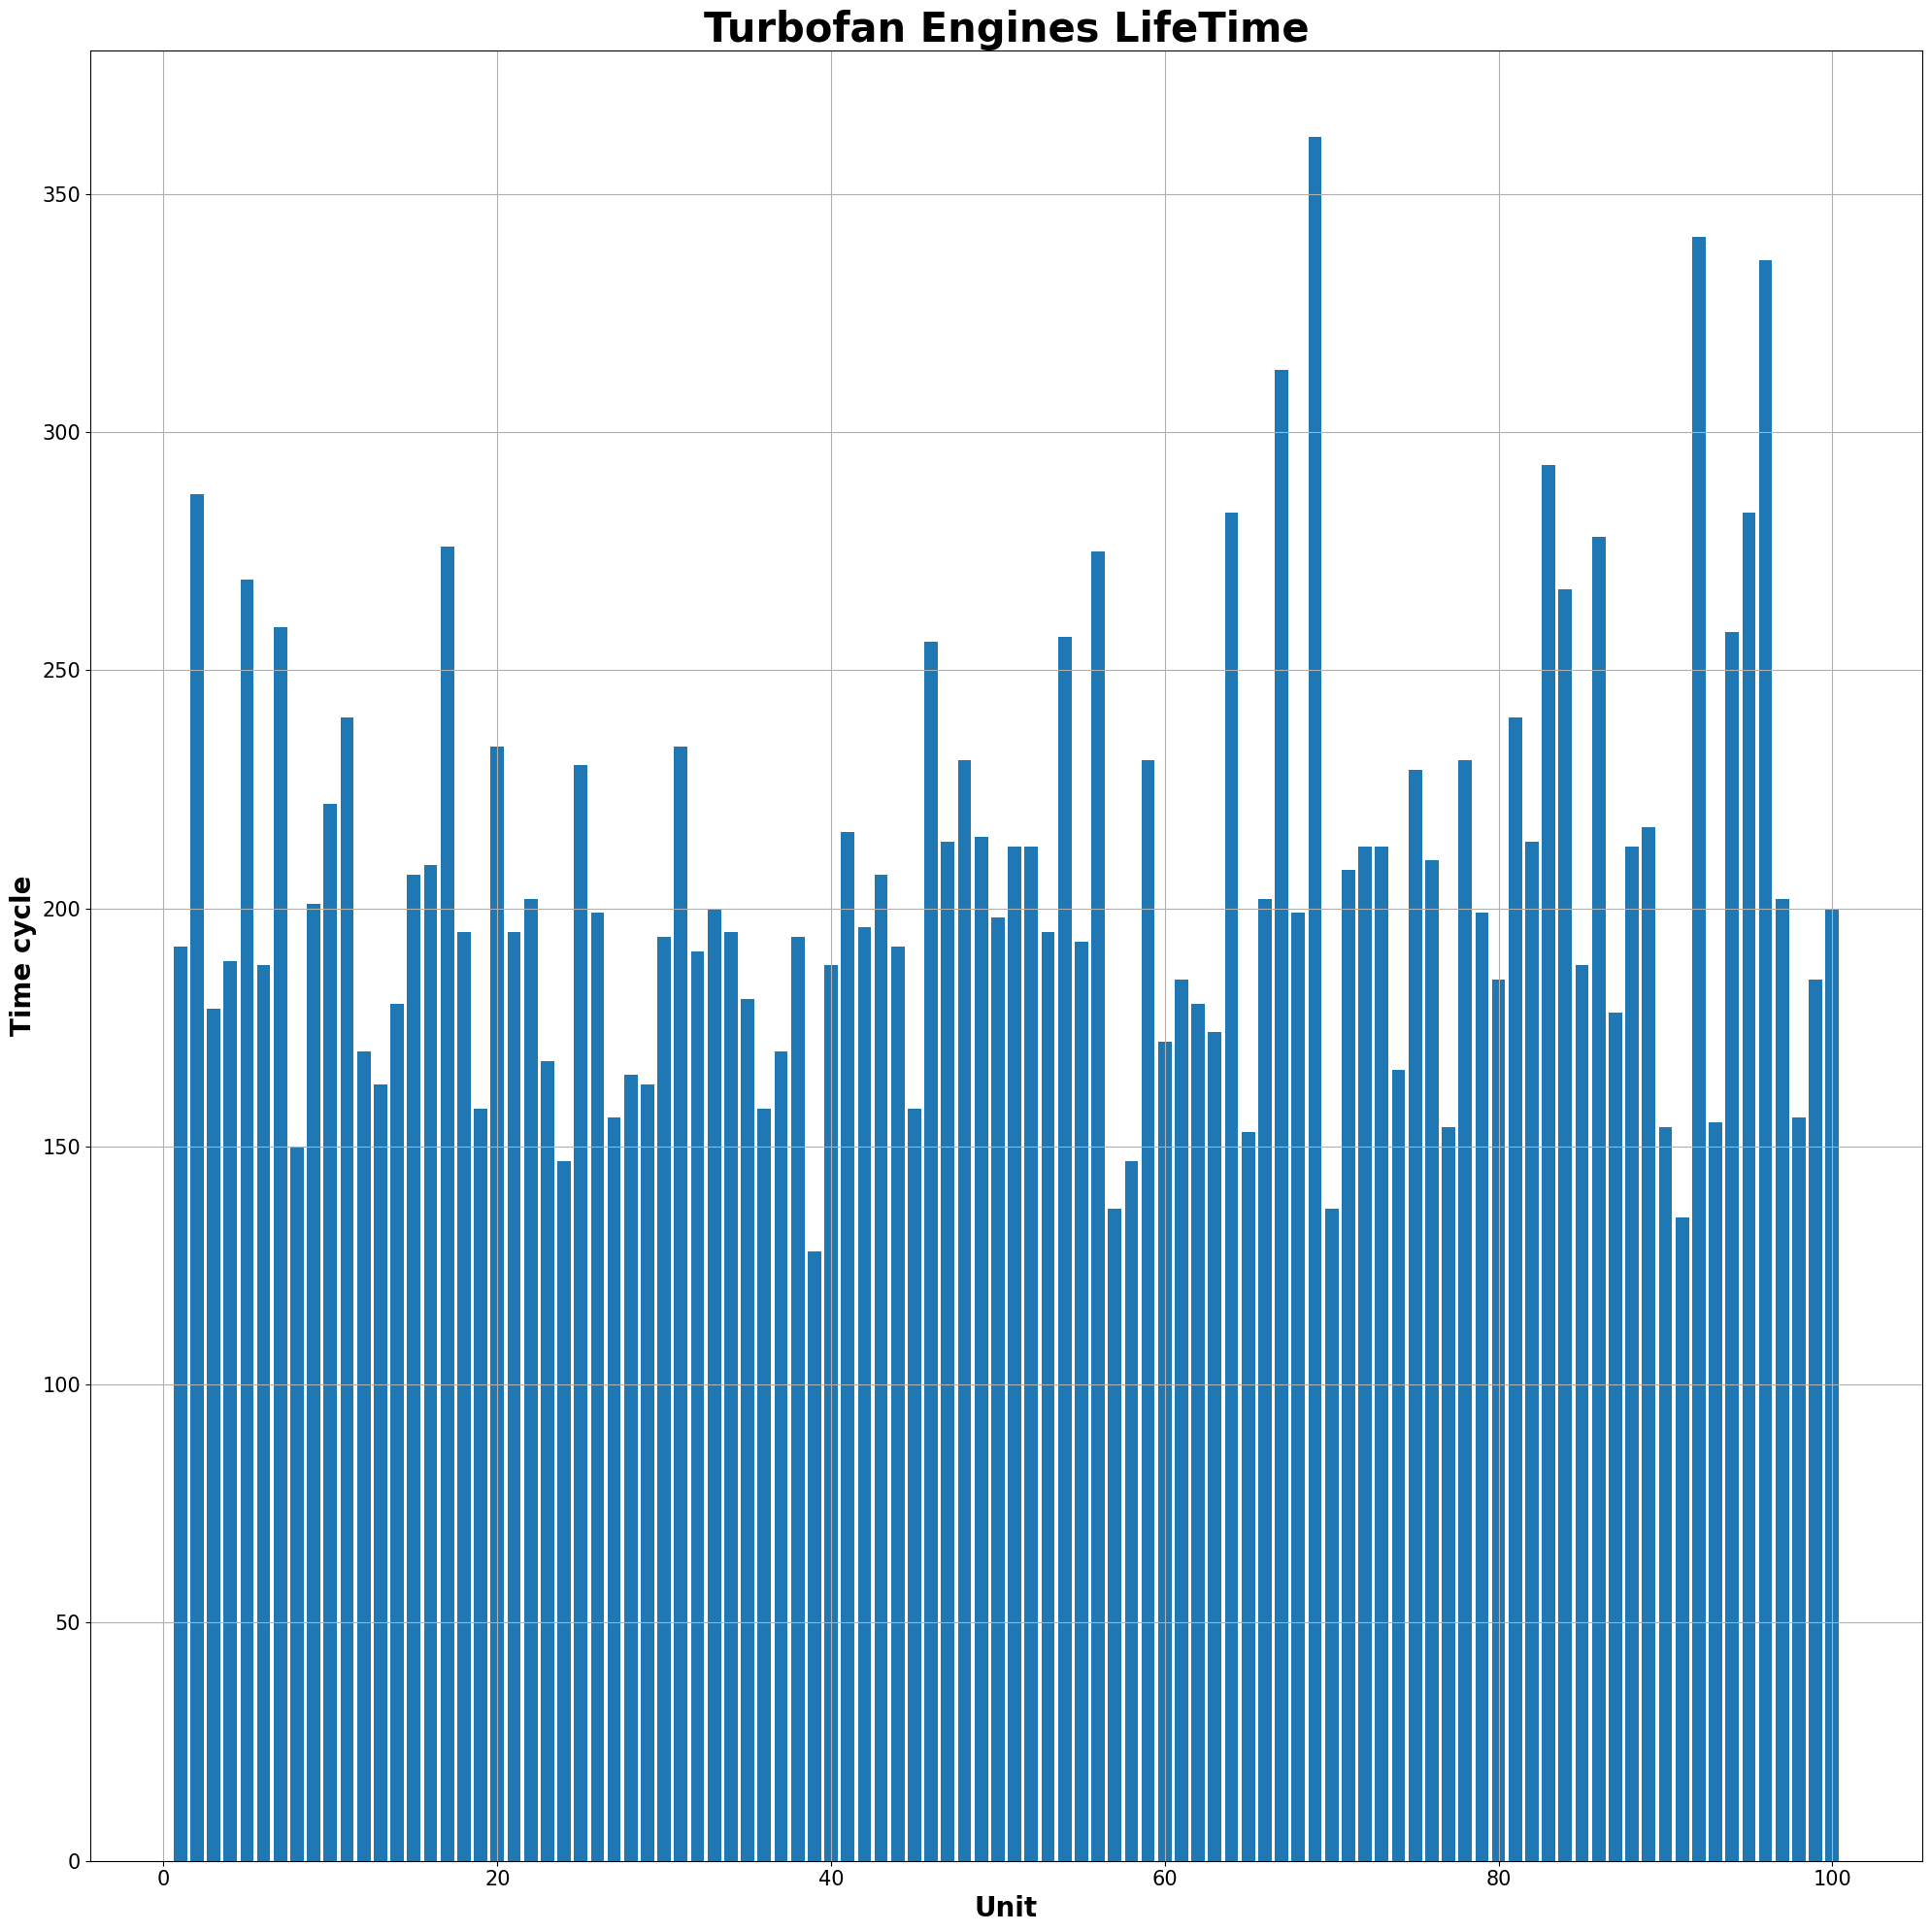

In [25]:
#Turbofan engines life time
plt.figure(figsize=(20,20))
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.bar(train_data.unit_nr.unique(),time_cycle_each)
plt.xlabel('Unit',fontweight='bold',size=20)
plt.ylabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('Turbofan Engines LifeTime.png')
plt.show()

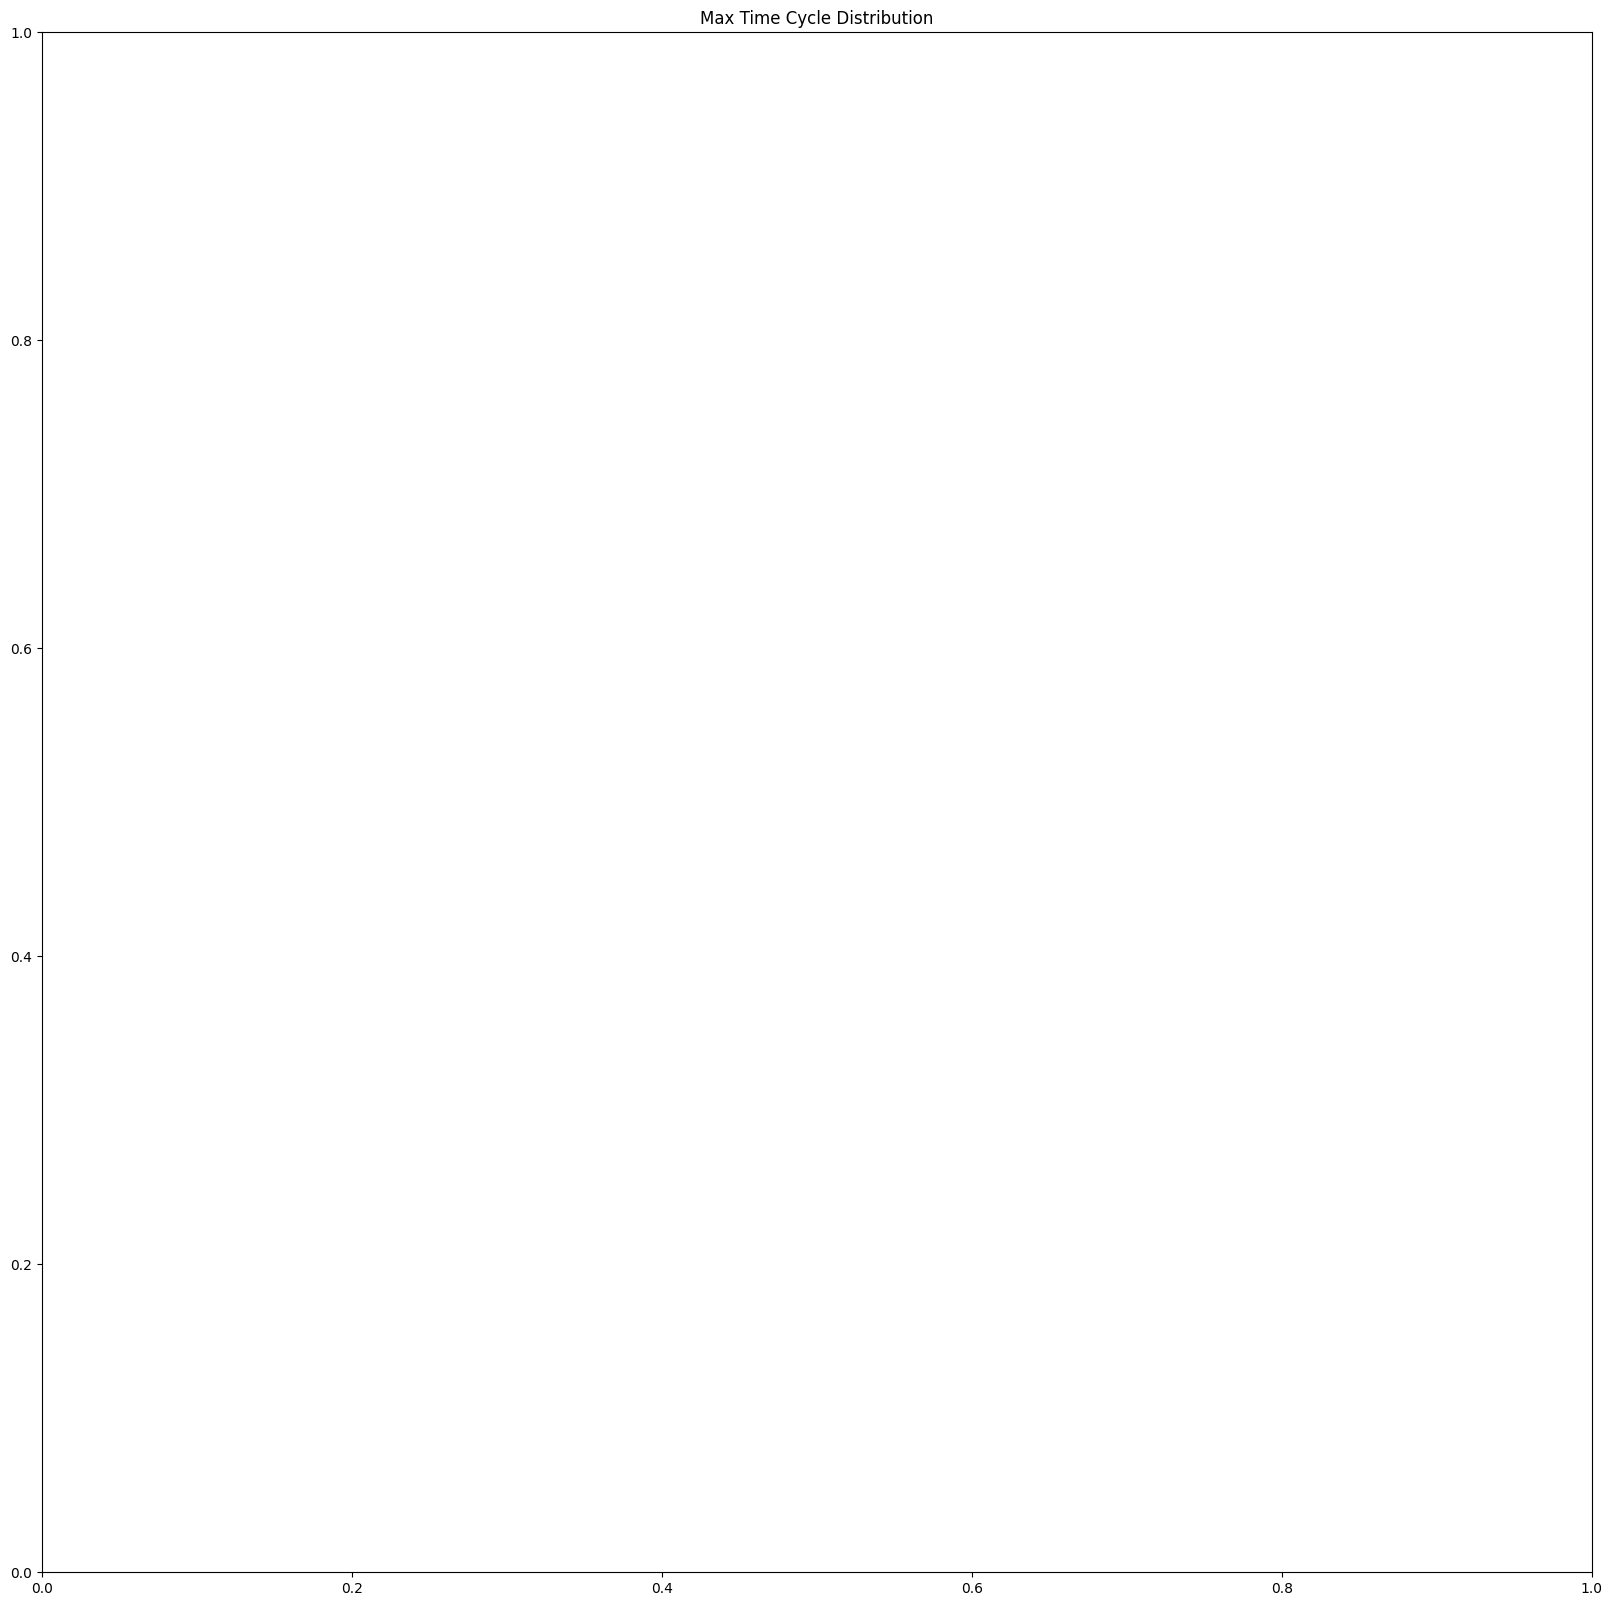

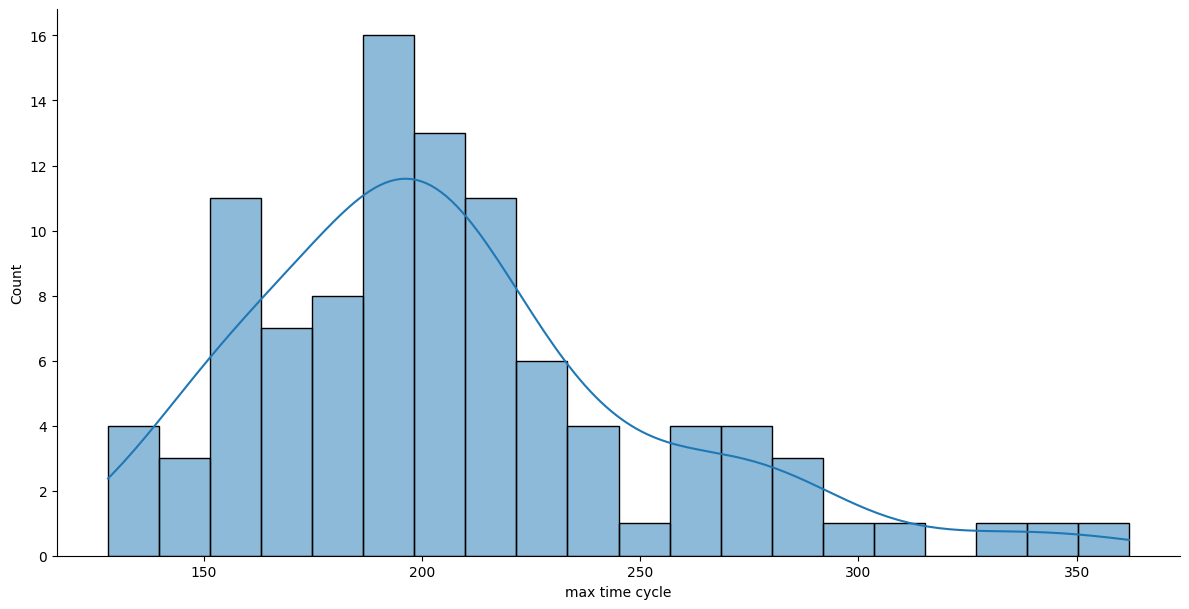

In [26]:
#Distribution of maximum time cycles
plt.figure(figsize=(20,20))
plt.title('Max Time Cycle Distribution')
sns.displot(time_cycle_each,kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')
plt.savefig('Max Time Cycle Distribution.png')
plt.show()

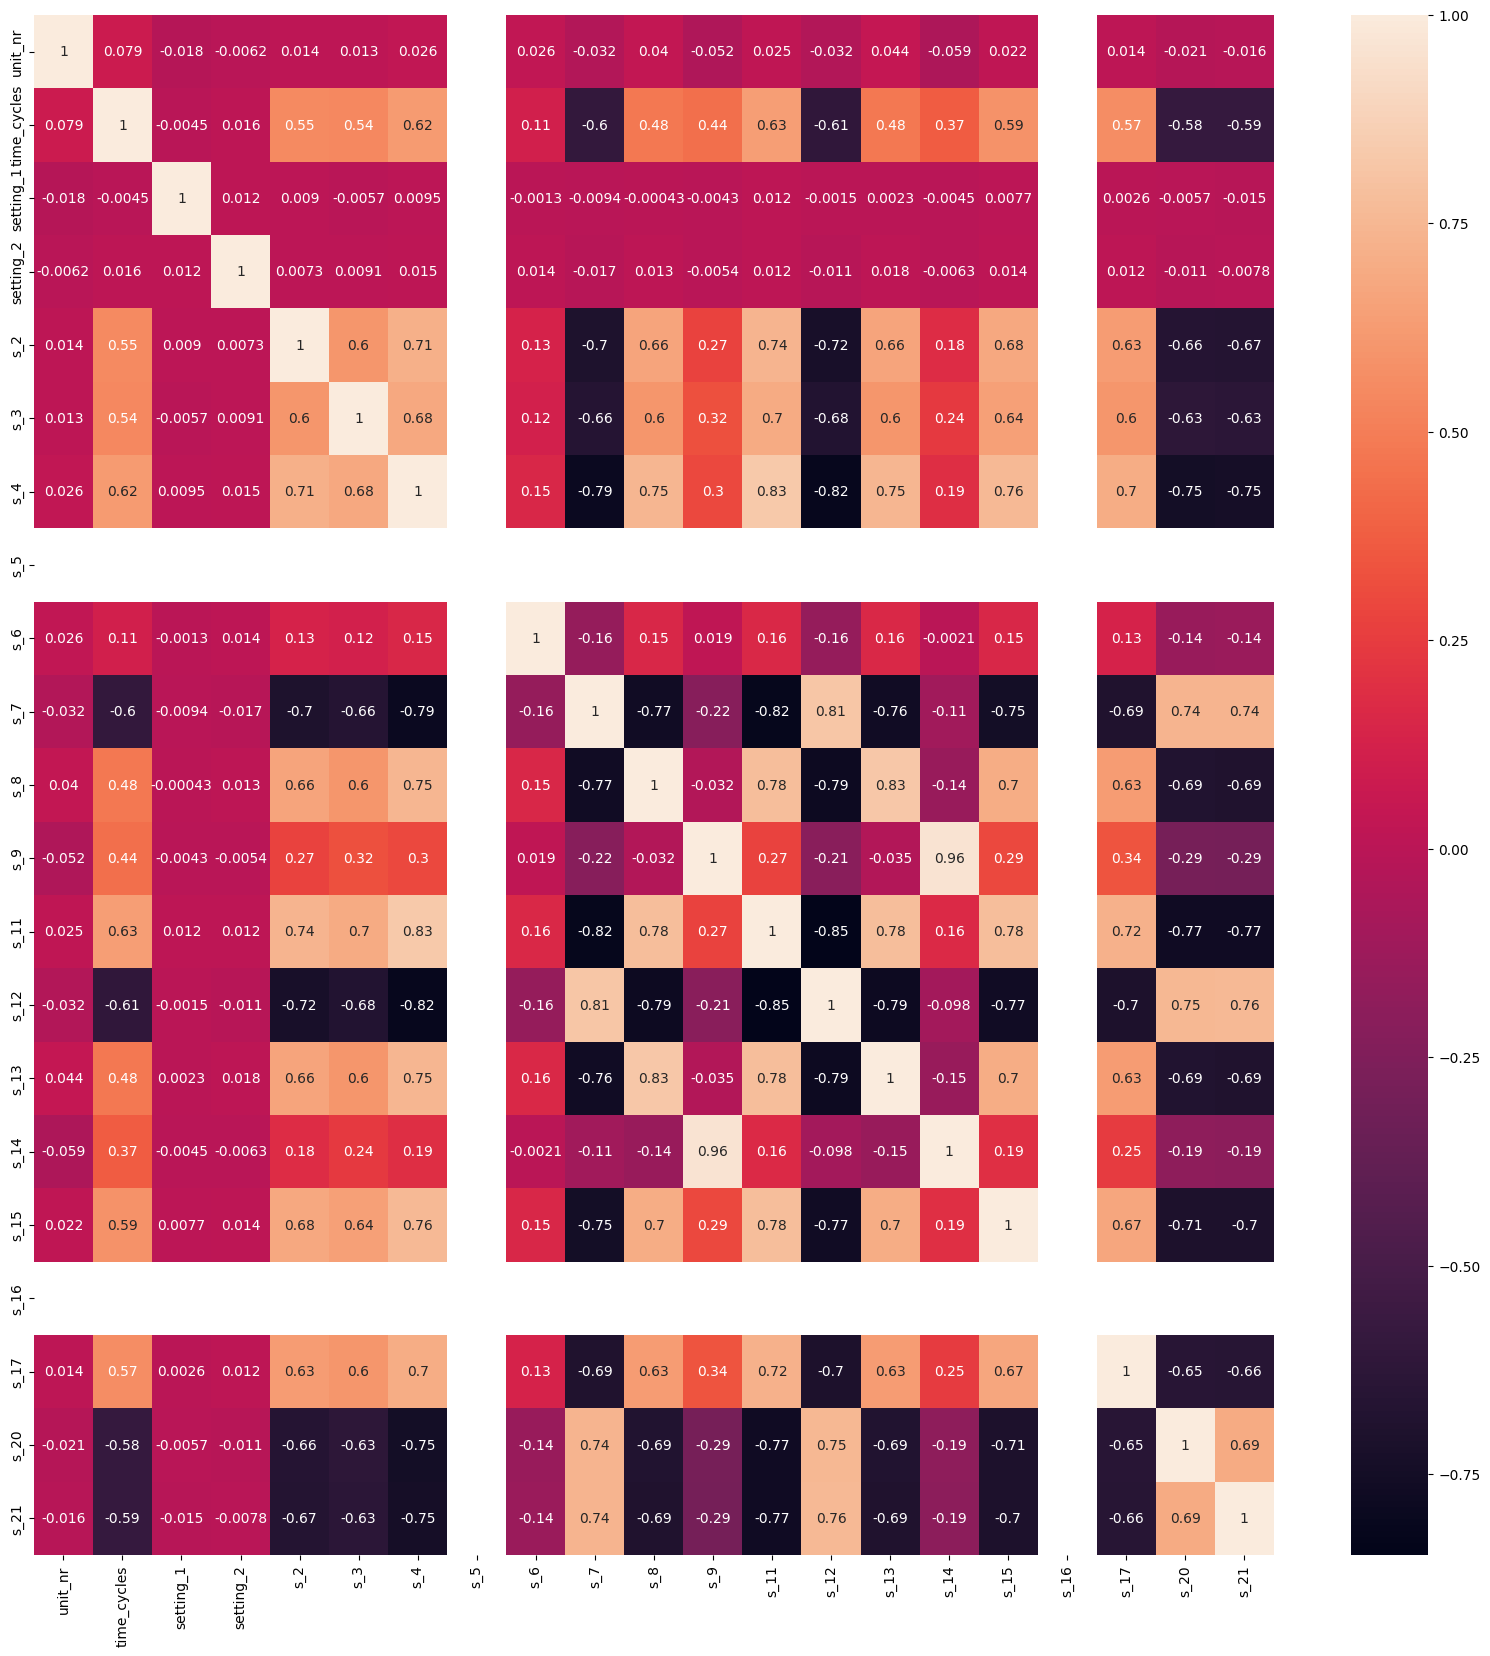

In [27]:
#Finding the correlated features using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(train_data.drop('RUL',axis=1).corr(),cbar=True,annot=True,xticklabels=train_data.columns.drop('RUL'))
plt.savefig('Correlation Heatmap.png')
plt.show()

In [28]:
corr=train_data.corr()
train_relevant_features = corr[abs(corr['RUL'])>=0.5]

imp_features=train_relevant_features.index[1:]
print(f'These are the important features that we are goint to consider: {imp_features}')

These are the important features that we are goint to consider: Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21', 'RUL'],
      dtype='object')


In [29]:
final_train_data = train_data[imp_features]
final_test_data = test_data[imp_features.drop('RUL')]

In [30]:
final_train_data.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  RUL  
0   392  39.06  23.4190  191  
1   392  39.00  23.4236  190  
2   390  38.95  23.3442  189  
3   392  38.88  23.3739  188  
4   393  38.90  23.4044  187

In [31]:
final_test_data.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  643.02  1585.29  1398.21  553.90  2388.04  47.20  521.72  2388.03  8.4052   
1  641.71  1588.45  1395.42  554.85  2388.01  47.50  522.16  2388.06  8.3803   
2  642.46  1586.94  1401.34  554.11  2388.05  47.50  521.97  2388.03  8.4441   
3  642.44  1584.12  1406.42  554.07  2388.03  47.28  521.38  2388.05  8.3917   
4  642.51  1587.19  1401.92  554.16  2388.01  47.31  522.15  2388.03  8.4031   

   s_17   s_20     s_21  
0   392  38.86  23.3735  
1   393  39.02  23.3916  
2   393  39.08  23.4166  
3   391  39.00  23.3737  
4   390  38.99  23.4130

In [32]:
def plot_timeseries(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train_data['unit_nr'].unique():
        if (i % 10 == 0): 
            plt.plot('RUL', sensor_name, data=train_data[train_data['unit_nr']==i])
    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 275, 25))
    plt.title(f'{sensor_name} sensor for each engines RUL')
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.savefig(f'{sensor_name} timeseries.png')
    plt.show()

In [33]:
def box_hist_plot(sensor_name):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(train_data[sensor_name],bins=10,kde=True)
    plt.title(f'{sensor_name} histogram')
    plt.subplot(122)
    plt.boxplot(train_data[sensor_name])
    plt.title(f'{sensor_name} boxplot')
    plt.savefig(f'{sensor_name} box_hist.png')
    plt.show()

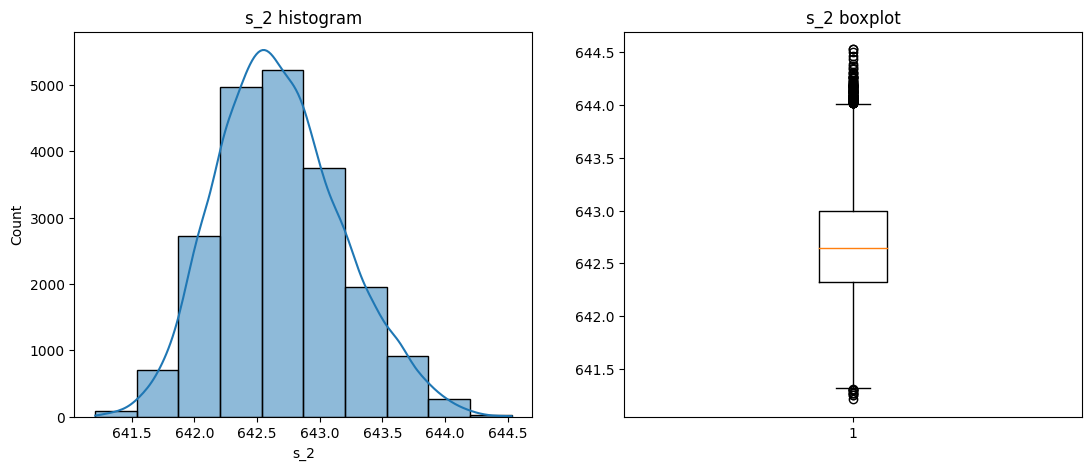

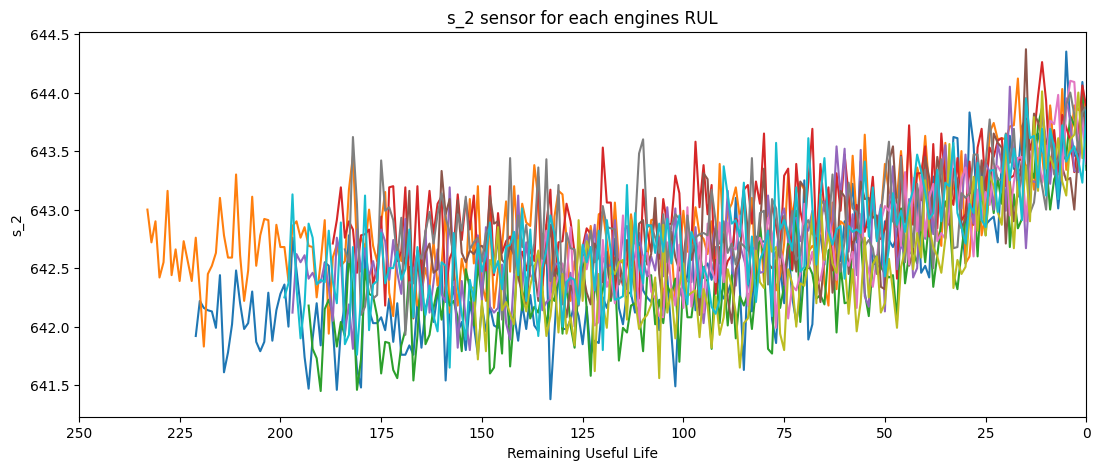

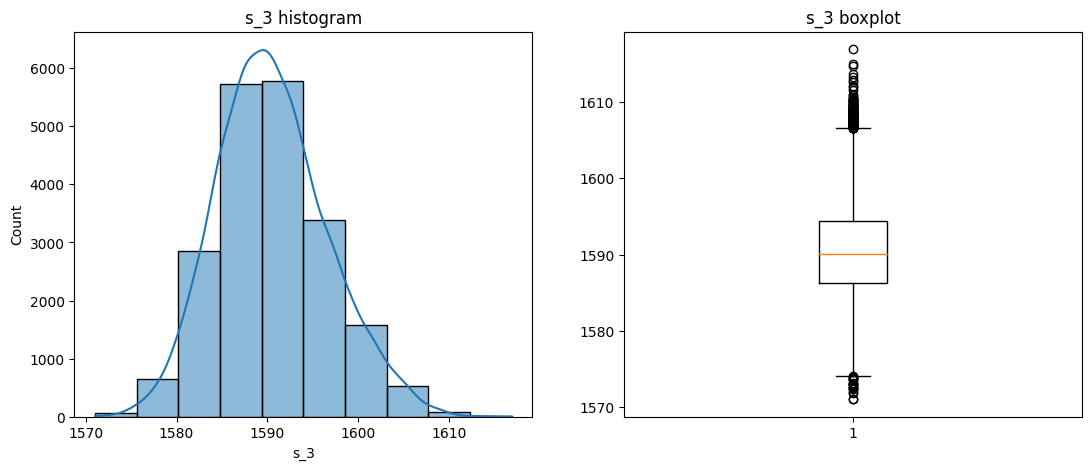

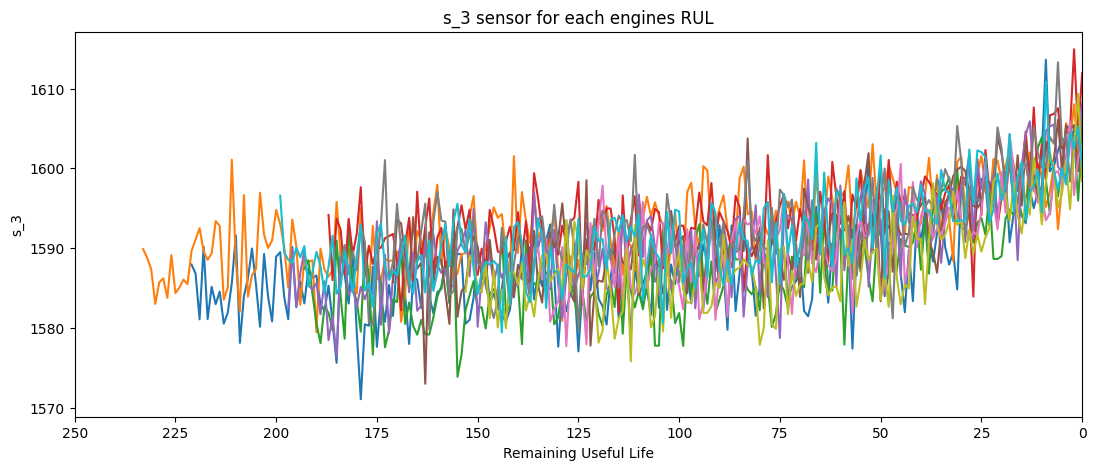

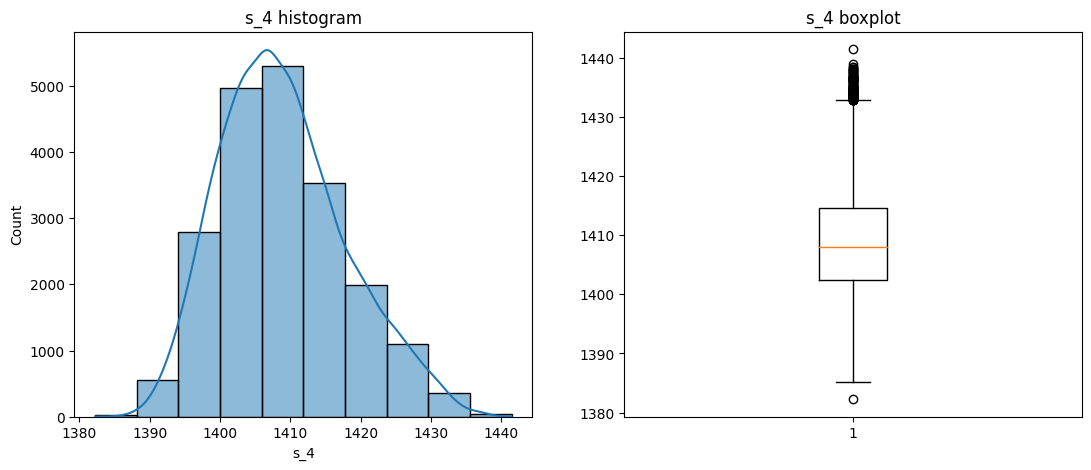

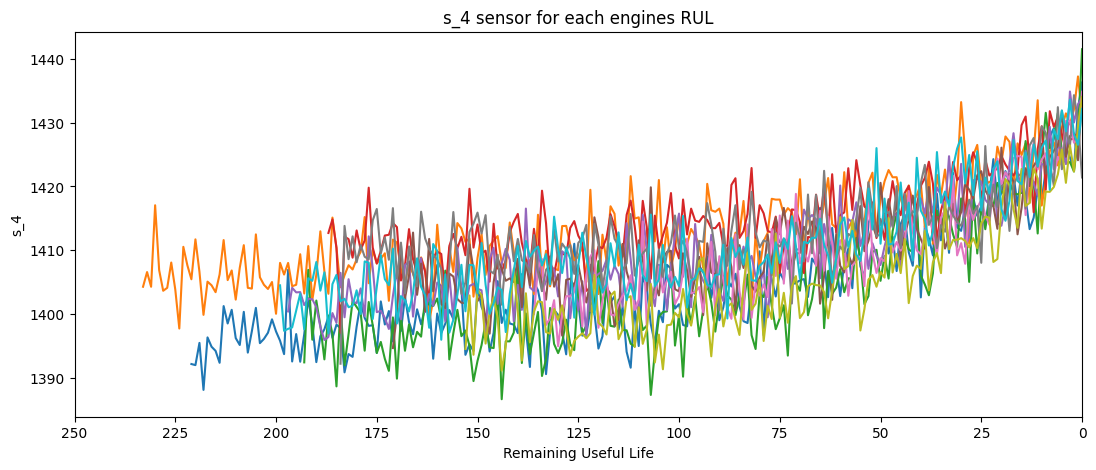

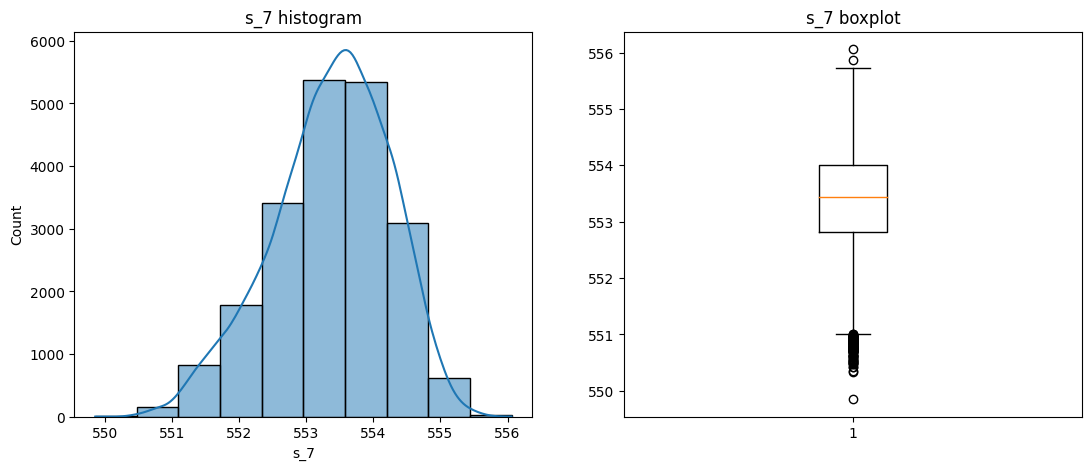

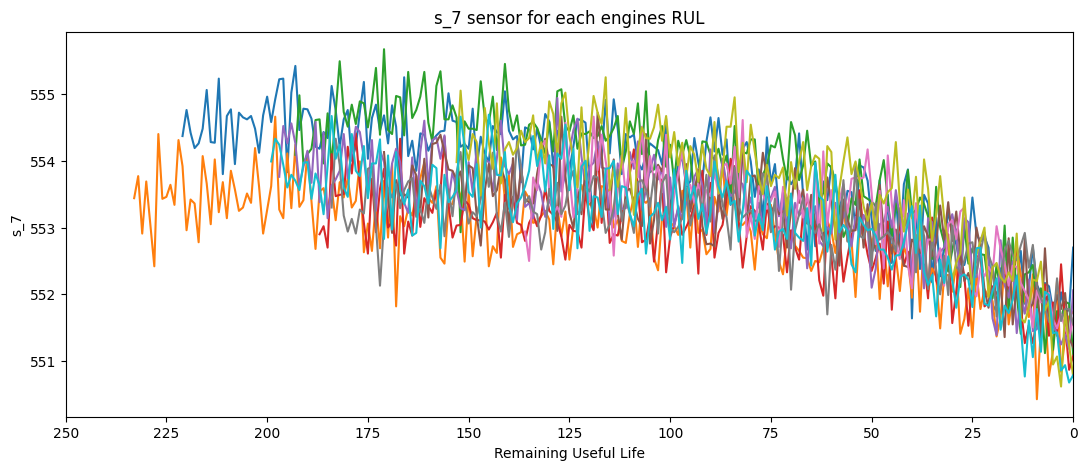

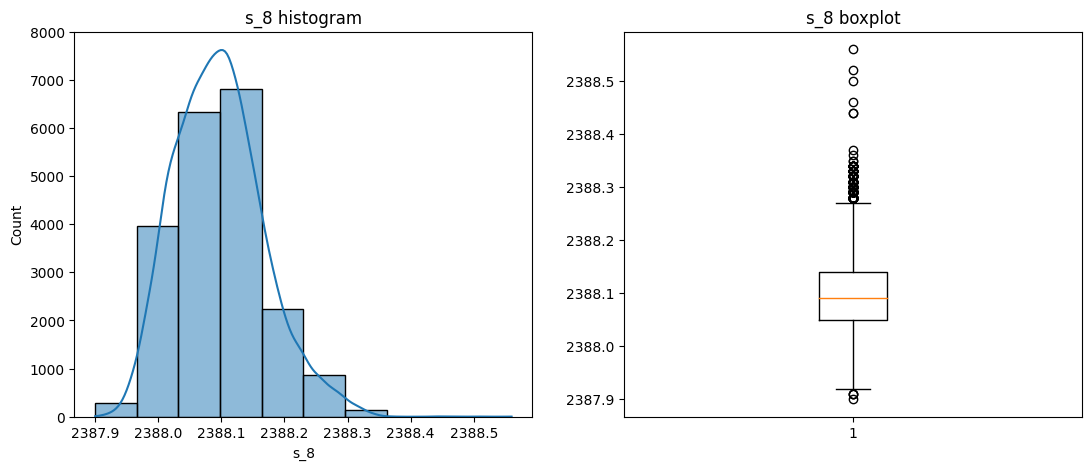

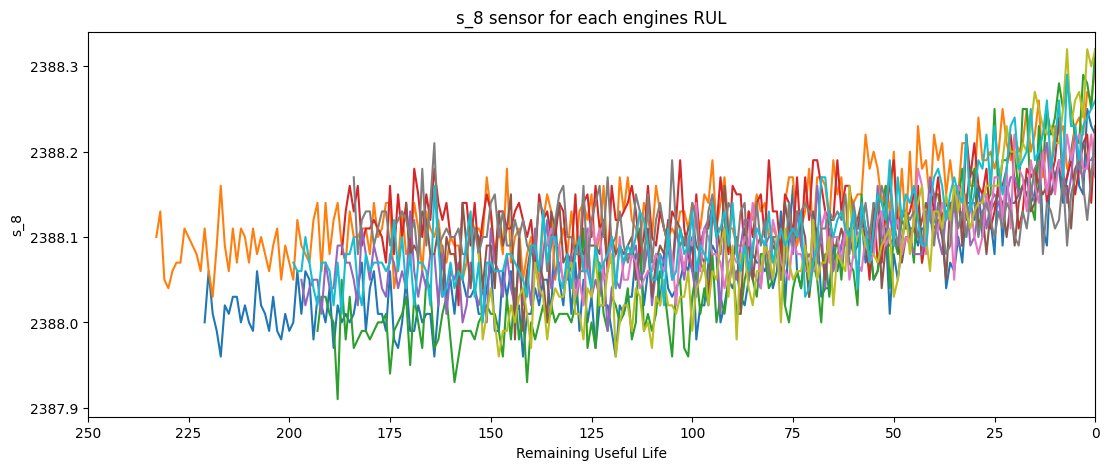

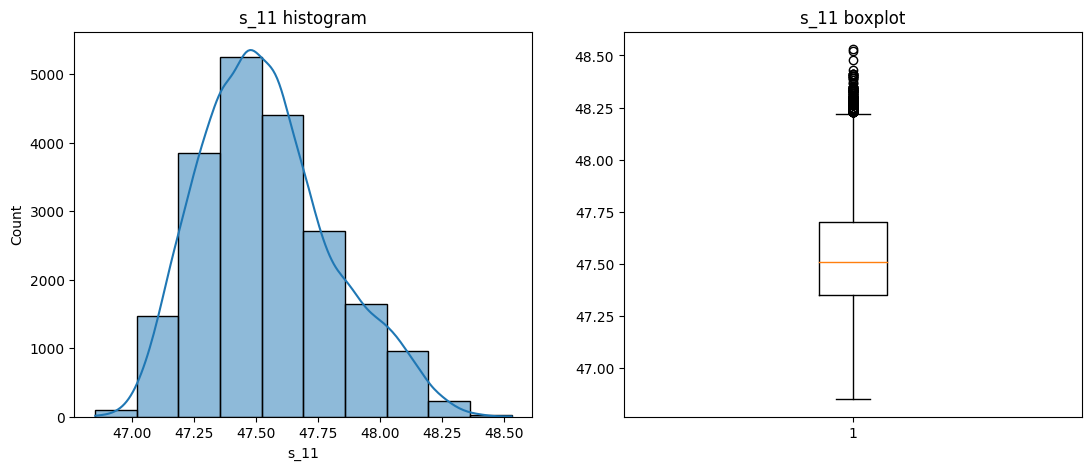

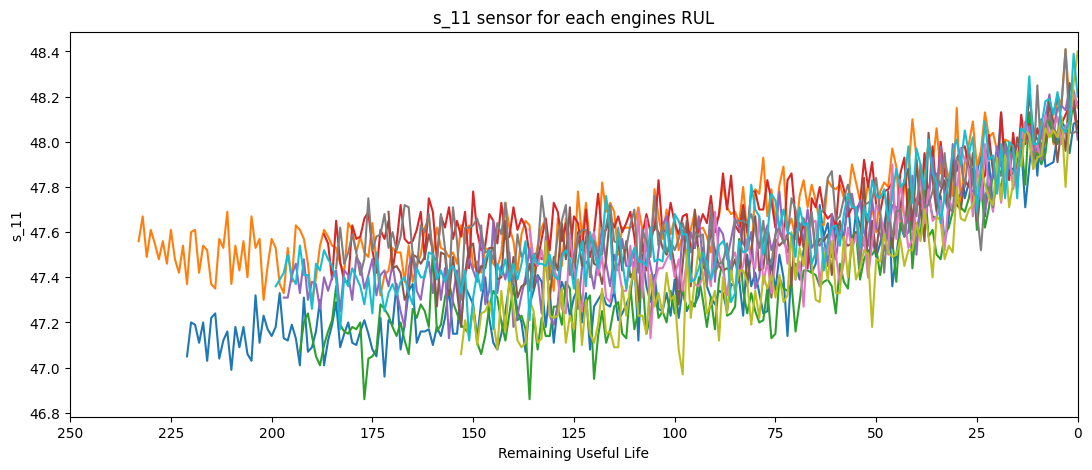

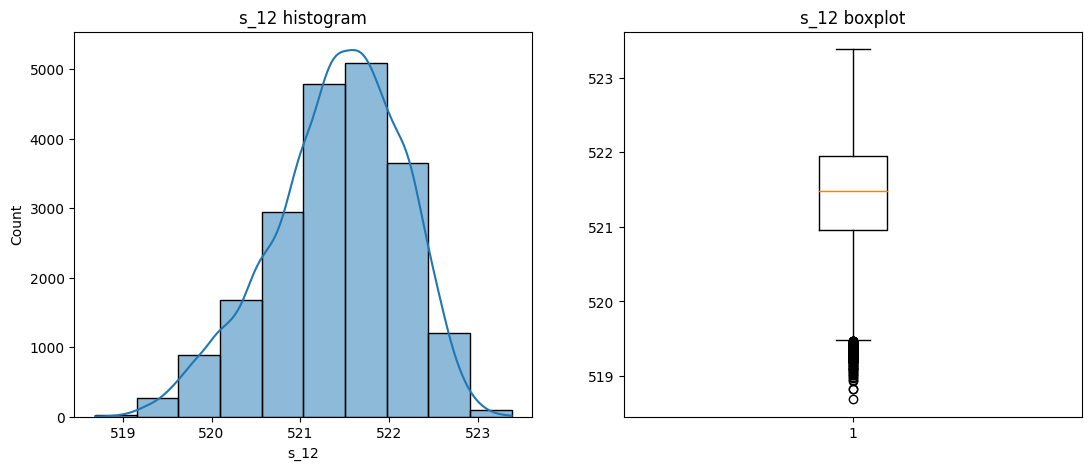

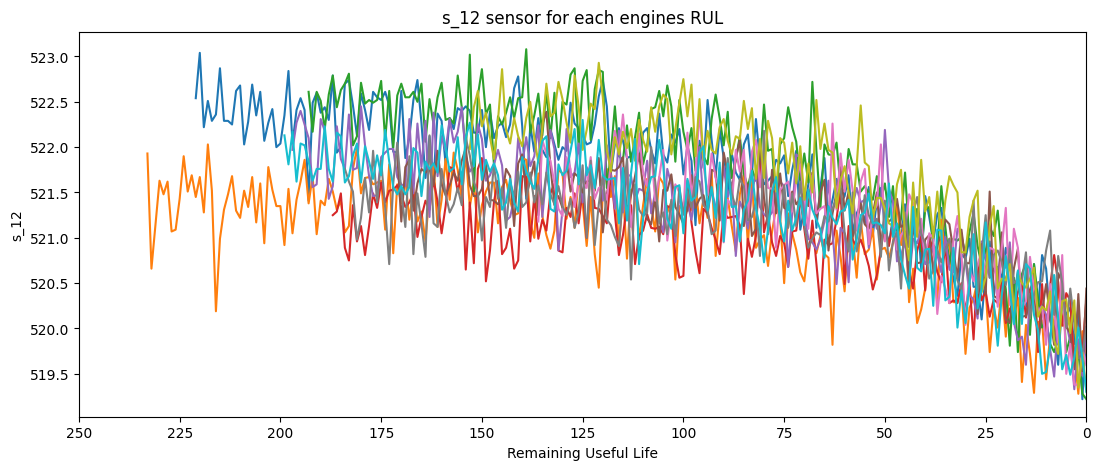

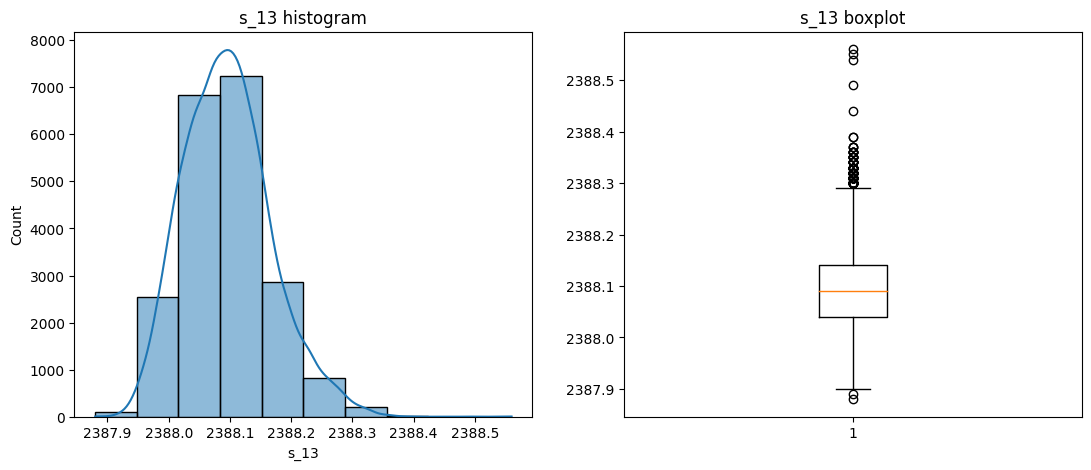

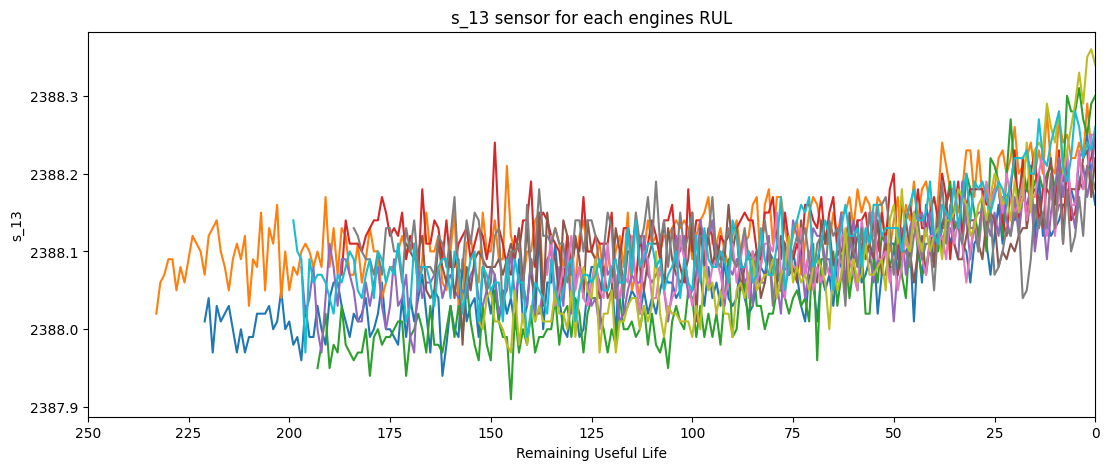

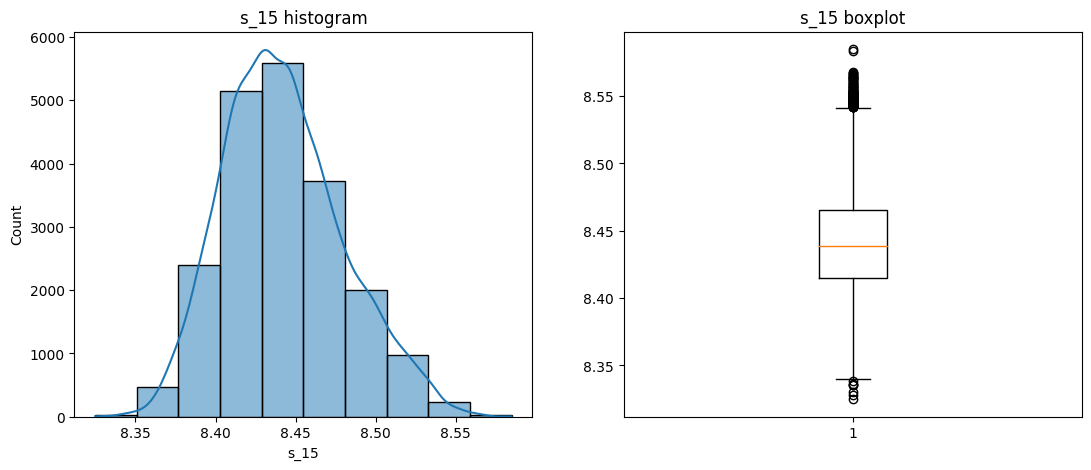

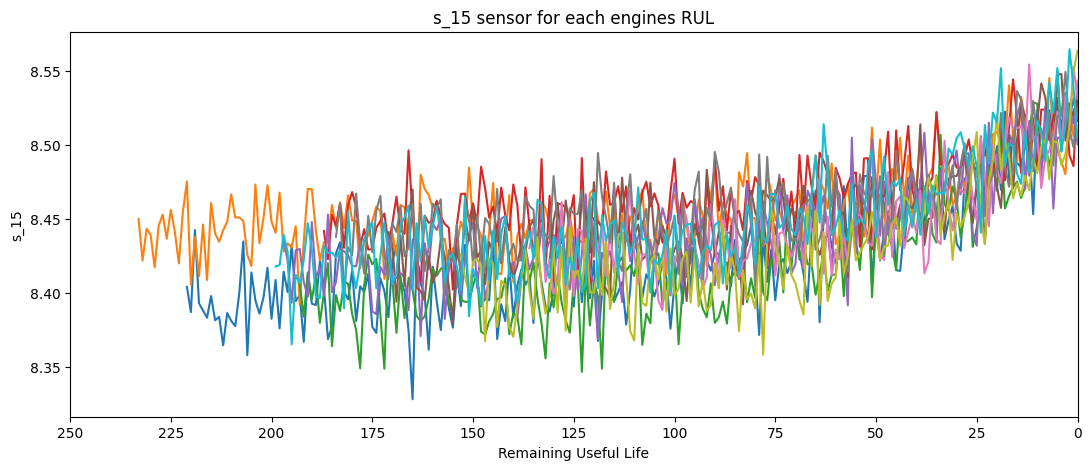

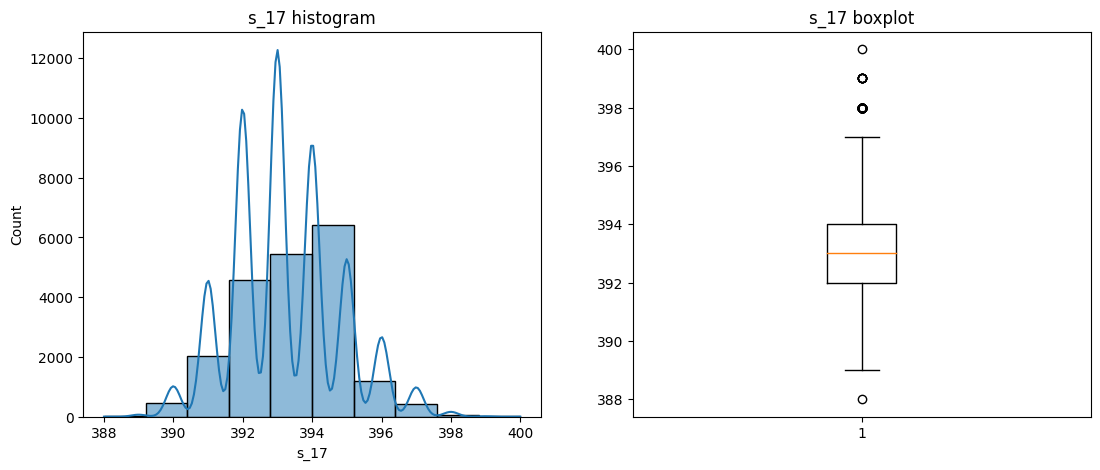

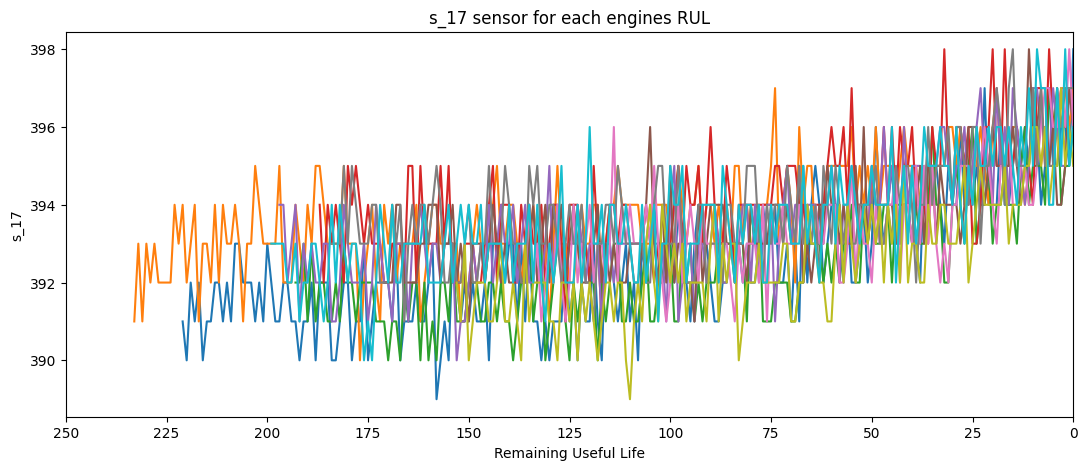

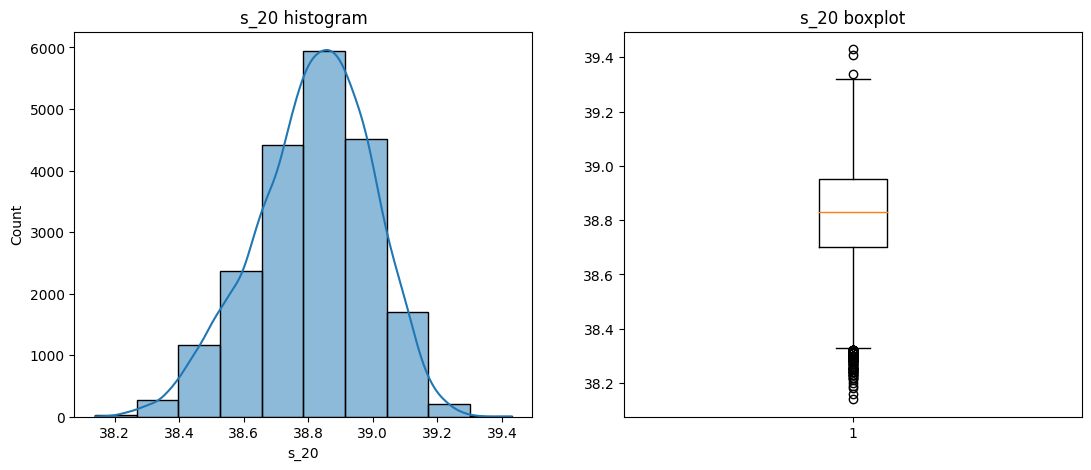

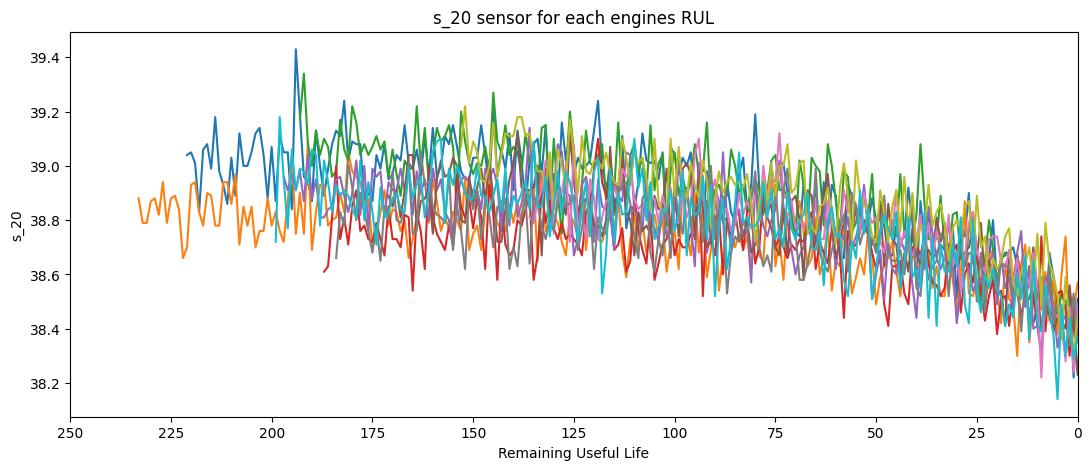

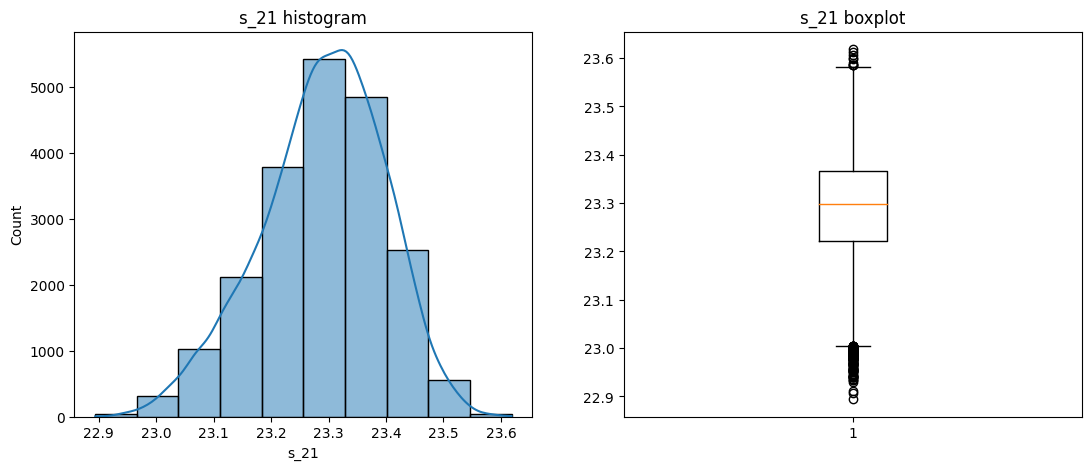

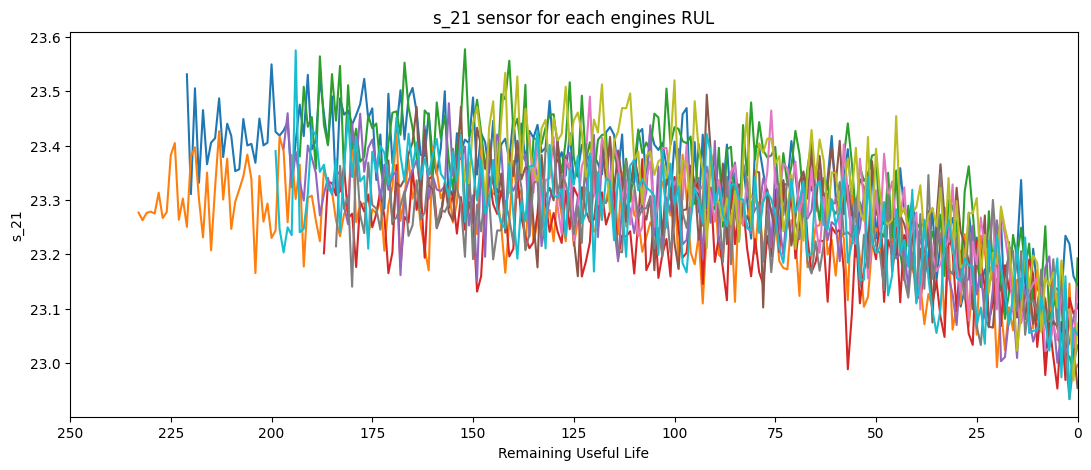

In [34]:
for i in imp_features.drop('RUL'):
    box_hist_plot(i)
    plot_timeseries(i)

#### Training and Testing separation

In [35]:
X_train=final_train_data.drop('RUL',axis=1)
y_train=final_train_data[['RUL']]

In [36]:
X_train.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  
0   392  39.06  23.4190  
1   392  39.00  23.4236  
2   390  38.95  23.3442  
3   392  38.88  23.3739  
4   393  38.90  23.4044

In [37]:
y_train

RUL
0      191
1      190
2      189
3      188
4      187
...    ...
20626    4
20627    3
20628    2
20629    1
20630    0

[20631 rows x 1 columns]

In [38]:
X_test=final_test_data[X_train.columns]
X_test.head()

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  643.02  1585.29  1398.21  553.90  2388.04  47.20  521.72  2388.03  8.4052   
1  641.71  1588.45  1395.42  554.85  2388.01  47.50  522.16  2388.06  8.3803   
2  642.46  1586.94  1401.34  554.11  2388.05  47.50  521.97  2388.03  8.4441   
3  642.44  1584.12  1406.42  554.07  2388.03  47.28  521.38  2388.05  8.3917   
4  642.51  1587.19  1401.92  554.16  2388.01  47.31  522.15  2388.03  8.4031   

   s_17   s_20     s_21  
0   392  38.86  23.3735  
1   393  39.02  23.3916  
2   393  39.08  23.4166  
3   391  39.00  23.3737  
4   390  38.99  23.4130

In [39]:
y_test

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [40]:
y_test = pd.DataFrame({'RUL': np.repeat(y_test['RUL'], time_cycle_each_test)})

In [41]:
y_test.set_index(i for i in range(13096))

RUL
0      112
1      112
2      112
3      112
4      112
...    ...
13091   20
13092   20
13093   20
13094   20
13095   20

[13096 rows x 1 columns]

In [42]:
print(f'The shape of the training data : {X_train.shape} , {y_train.shape}')
print(f'The shape of the testing data : {X_test.shape} , {y_test.shape}')

The shape of the training data : (20631, 12) , (20631, 1)
The shape of the testing data : (13096, 12) , (13096, 1)


#### Standardizing the features of the dataset

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Exploration

In [44]:
def actual_vs_predicted(model, y_test, y_pred):
    plt.figure(figsize=(20,11))
    plt.plot(y_test,color="blue", linewidth=2.5, linestyle="-",label="Actual")
    plt.plot(y_pred,color="red",  linewidth=2.5, linestyle="-",label="Predicted")
    plt.title(f'Actual and Predicted for {model}', fontsize=20)                                        
    plt.ylabel('RUL', fontsize=16)                           
    plt.legend()
    plt.savefig(f'Actual VS Predicted {model}.png')
    plt.show()

#### Model 1: Linear Regression

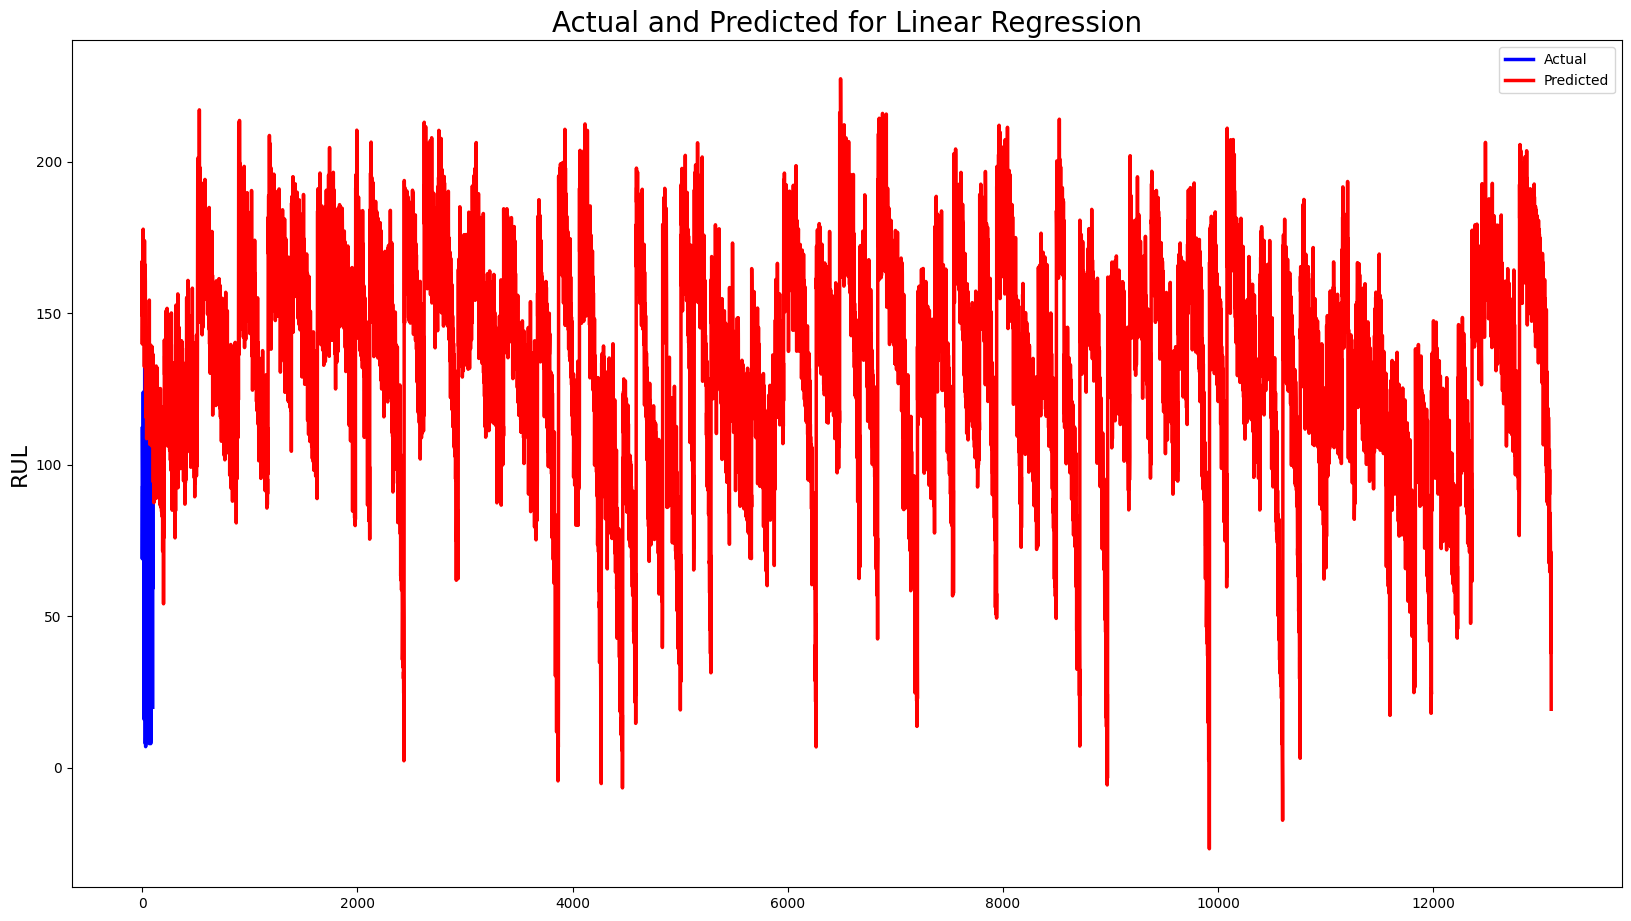

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

#Fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

#Prediction
y_pred_lr = lr.predict(X_test)

#Evaluation
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = abs(r2_score(y_test,y_pred_lr))
acc_lr = round(lr.score(X_train,y_train),2)*100
rmse_lr = mse_lr**0.5

#Plotting
actual_vs_predicted('Linear Regression', y_test, y_pred_lr)

#Results
Results=pd.DataFrame({'Model':['Linear Regression'],'MSE':[mse_lr],'RMSE':[rmse_lr],'R2':[r2_lr],'Accuracy':[acc_lr]})

#### Model 2: Lasso Regression

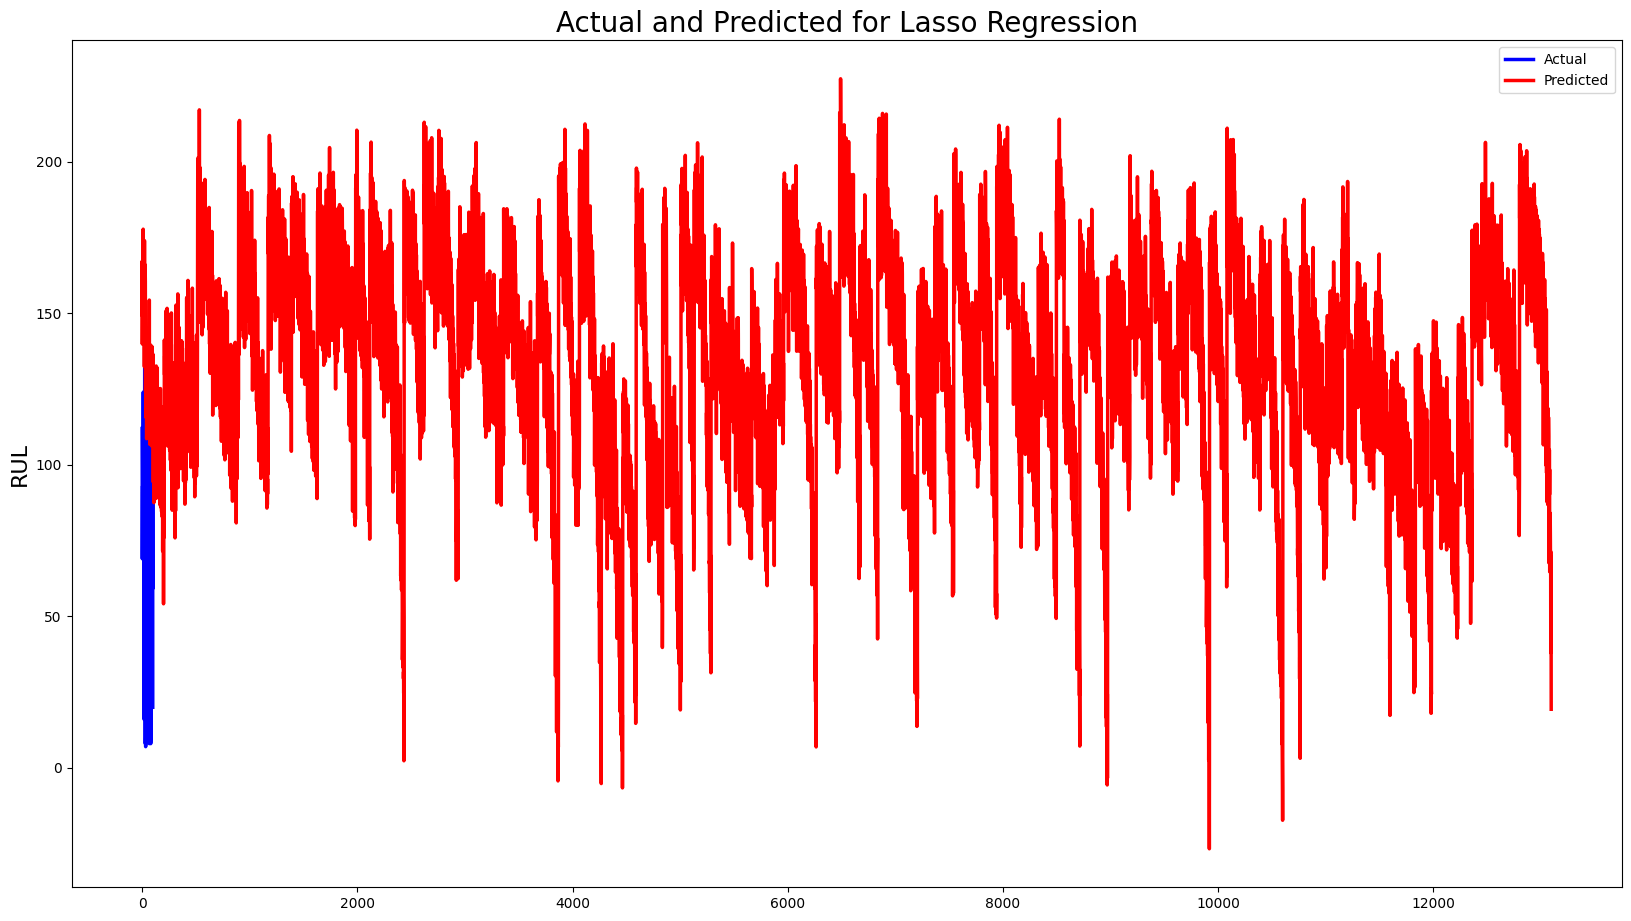

In [46]:
from sklearn.linear_model import Lasso

#Fitting
las = Lasso()
las.fit(X_train,y_train)

#Prediction
y_pred_las = las.predict(X_test)

#Evaluation 
mse_las = mean_squared_error(y_test,y_pred_las)
r2_las = abs(r2_score(y_test,y_pred_las))
acc_las = round(las.score(X_train, y_train),2)*100
rmse_las = mse_las ** 0.5

#Plotting
actual_vs_predicted('Lasso Regression', y_test, y_pred_lr)

#Results
Results=Results.append(pd.DataFrame({'Model':['Lasso Regression'],'MSE':[mse_las],'RMSE':[rmse_las],'R2':[r2_las],'Accuracy':[acc_las]}),ignore_index=True)

#### Model 3: Ridge Regression

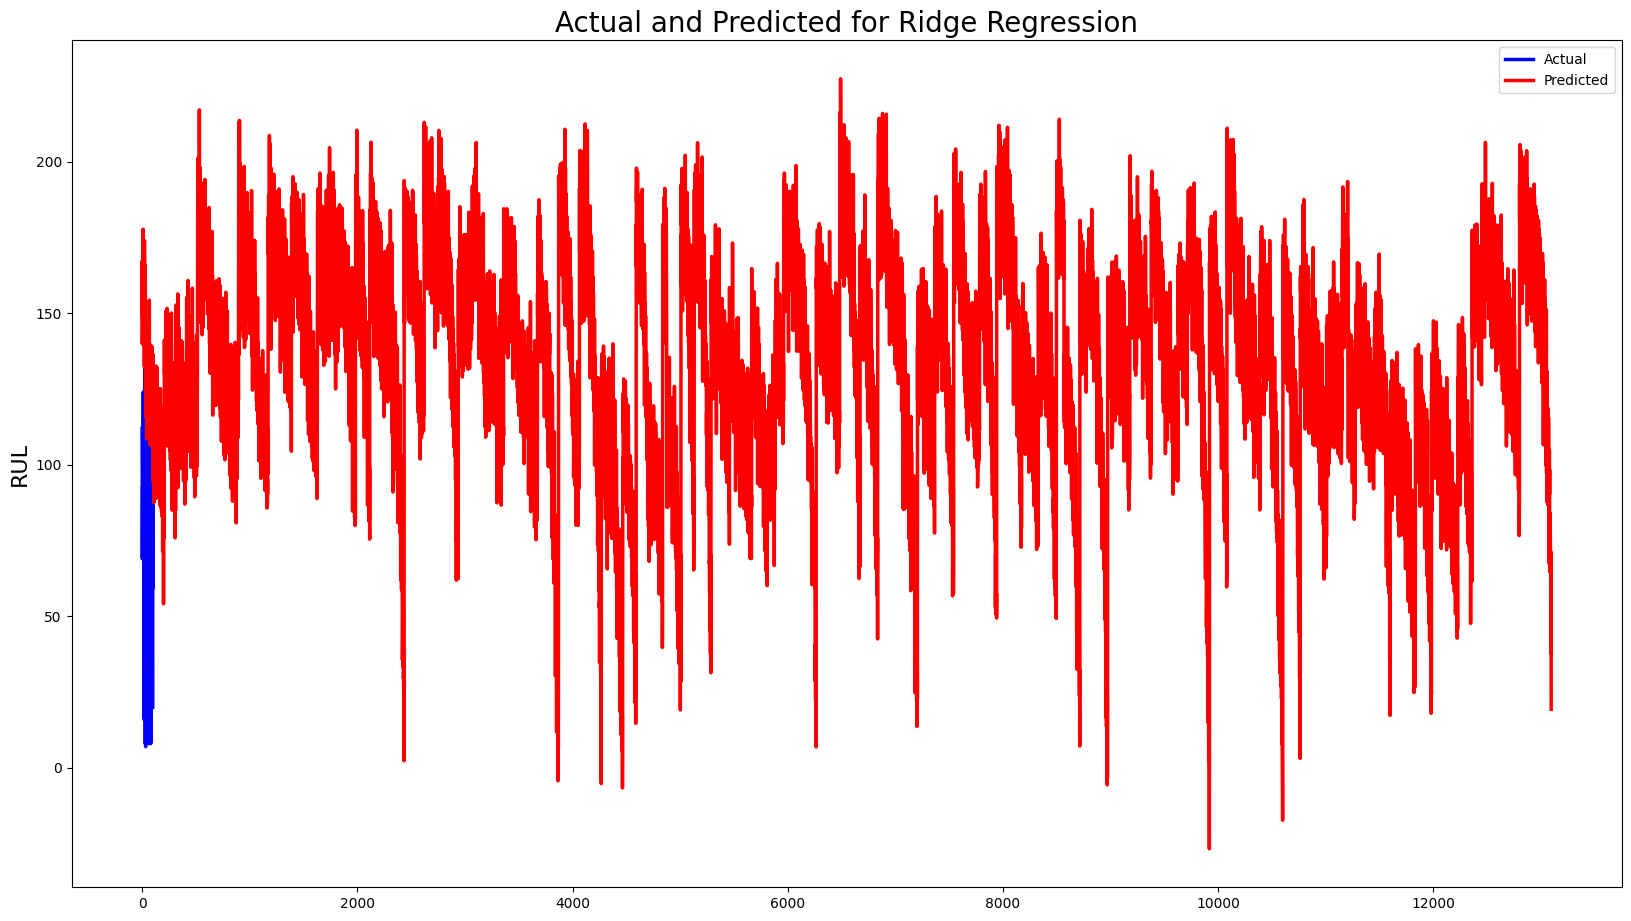

In [47]:
from sklearn.linear_model import Ridge

#Fitting
rid = Ridge()
rid.fit(X_train, y_train)

#Prediction
y_pred_rid = rid.predict(X_test)

#Evaluation
mse_rid = mean_squared_error(y_test, y_pred_rid)
r2_rid = abs(r2_score(y_test, y_pred_rid))
acc_rid = round(rid.score(X_train,y_train),2)*100
rmse_rid = mse_rid ** 0.5

#Plotting
actual_vs_predicted('Ridge Regression', y_test, y_pred_rid)

#Results
Results=Results.append(pd.DataFrame({'Model':['Ridge Regression'],'MSE':[mse_rid],'RMSE':[rmse_rid],'R2':[r2_rid],'Accuracy':[acc_rid]}),ignore_index=True)

#### Model 4: Decision Tree

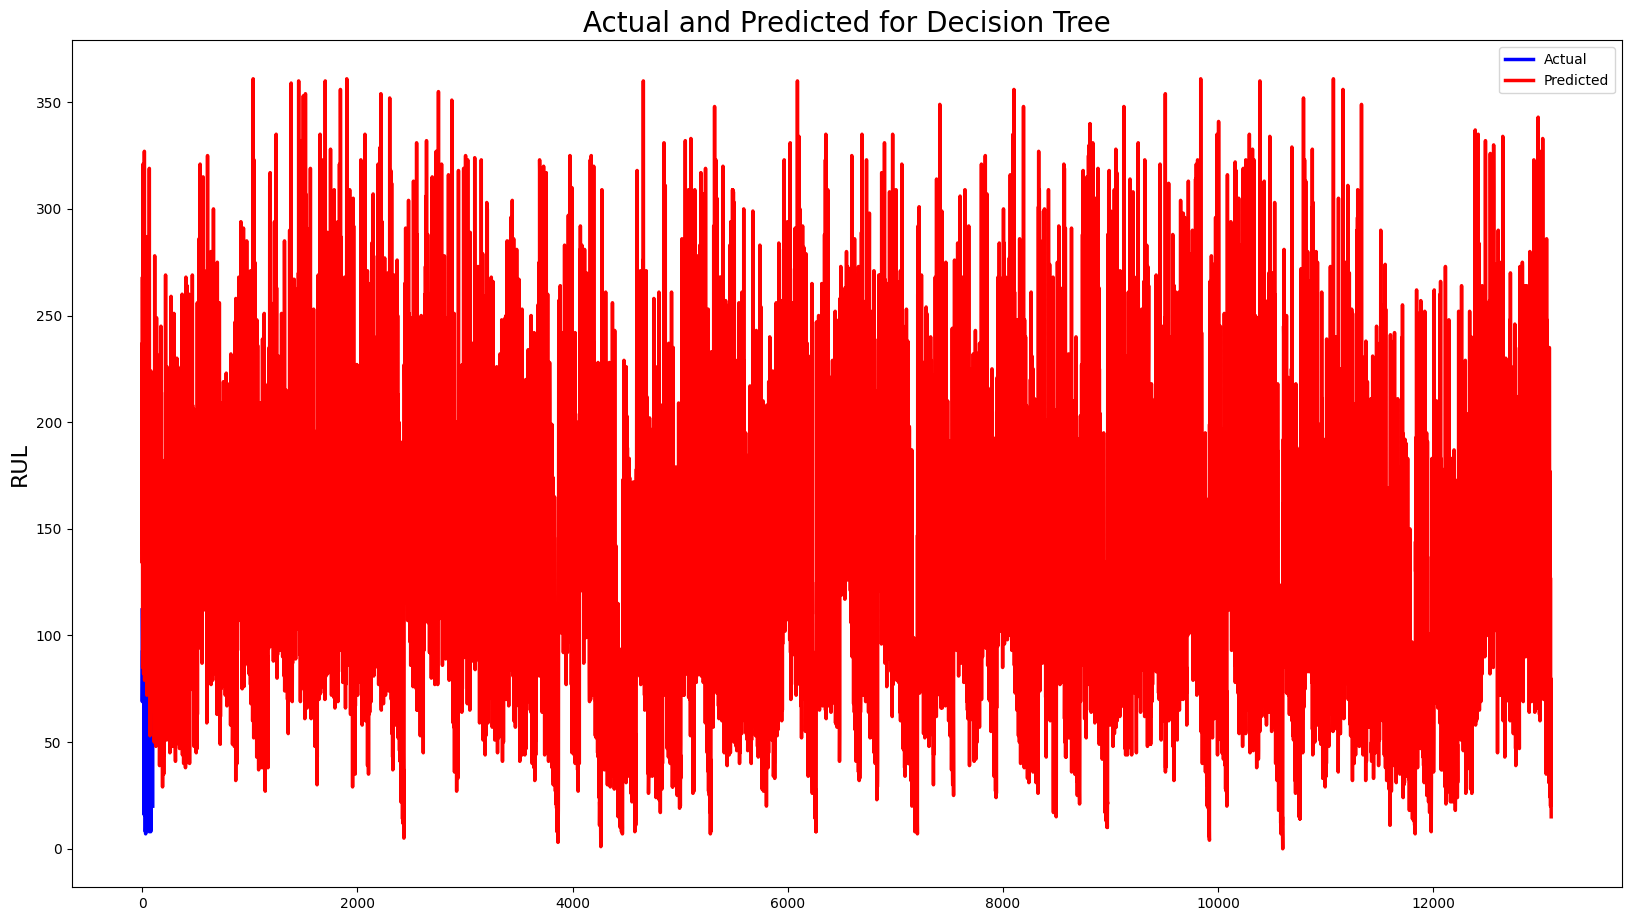

In [48]:
from sklearn.tree import DecisionTreeRegressor

#Fitting
dec = DecisionTreeRegressor()
dec.fit(X_train,y_train)

#Prediction
y_pred_dec = dec.predict(X_test)

#Evalutation
mse_dec = mean_squared_error(y_test, y_pred_dec)
rmse_dec = mse_dec ** 0.5
r2_dec = abs(r2_score(y_test, y_pred_dec))
acc_dec = round(dec.score(X_train,y_train),2)*100

#Plotting
actual_vs_predicted('Decision Tree', y_test, y_pred_dec)

#Results
Results = Results.append(pd.DataFrame({'Model':['Decision Tree'],'MSE':[mse_dec],'RMSE':[rmse_dec],'R2':[r2_dec],'Accuracy':[acc_dec]}),ignore_index=True)

#### Model 5: Random Forest

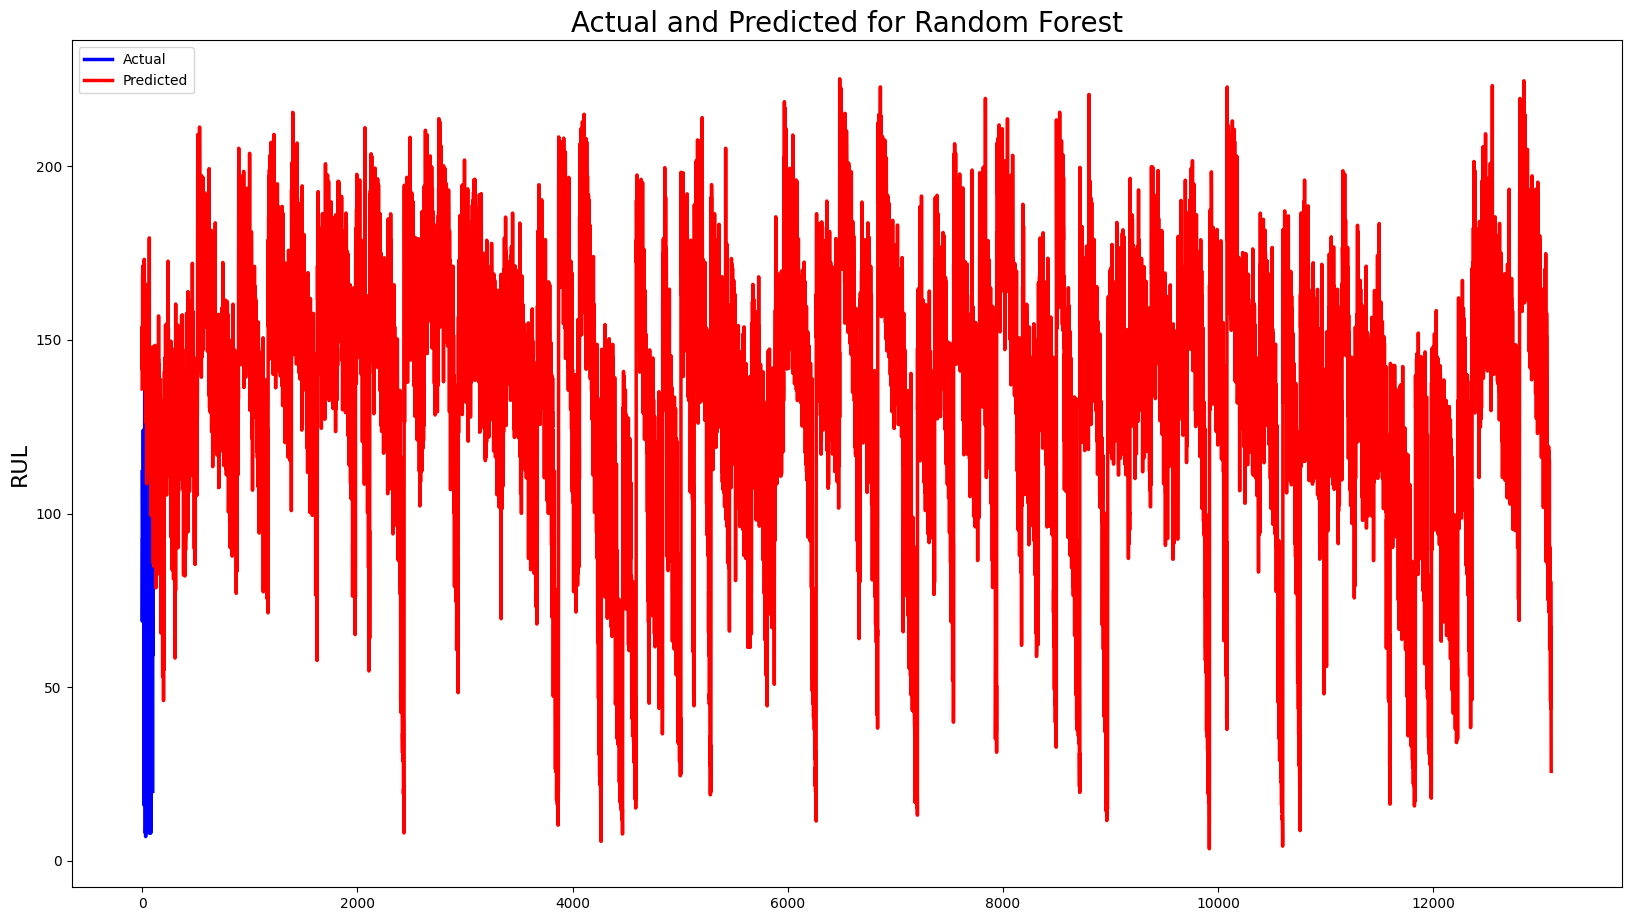

In [49]:
from sklearn.ensemble import RandomForestRegressor

#Fitting
ran = RandomForestRegressor()
ran.fit(X_train,y_train)

#Prediction
y_pred_ran = ran.predict(X_test)

#Evalutation
mse_ran = mean_squared_error(y_test, y_pred_ran)
rmse_ran = mse_ran ** 0.5
r2_ran = abs(r2_score(y_test, y_pred_ran))
acc_ran = round(ran.score(X_train,y_train),2)*100

#Plotting
actual_vs_predicted('Random Forest', y_test, y_pred_ran)

#Results
Results = Results.append(pd.DataFrame({'Model':['Random Forest'],'MSE':[mse_ran],'RMSE':[rmse_ran],'R2':[r2_ran],'Accuracy':[acc_ran]}),ignore_index=True)

#### Model 6: Support Vector Regression

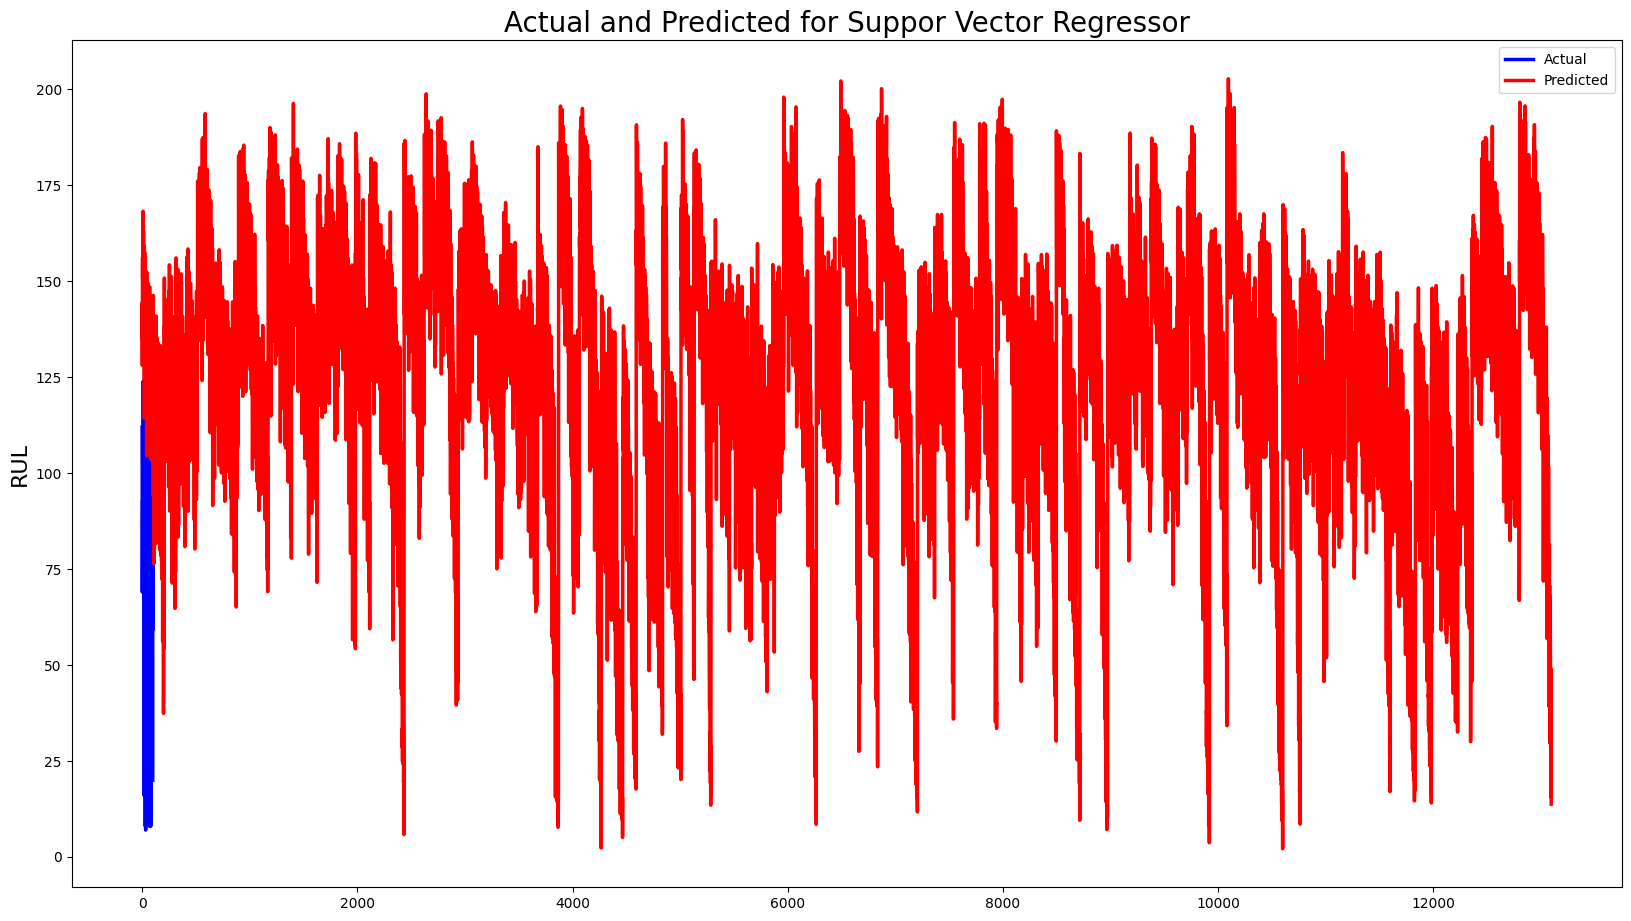

In [50]:
from sklearn.svm import SVR

#Fitting
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

#Prediction
y_pred_svr = svr.predict(X_test)

#Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr**0.5
r2_svr = abs(r2_score(y_test, y_pred_svr))
acc_svr = round(svr.score(X_train,y_train),2)*100

#Plotting
actual_vs_predicted('Suppor Vector Regressor', y_test, y_pred_svr)

#Results
Results = Results.append(pd.DataFrame({'Model':['Suport Vector Regressor'], 'MSE': [mse_svr], 'RMSE': [rmse_svr], 'R2': [r2_svr], 'Accuracy': [acc_svr]}),ignore_index=True)

#### Model 7: Gradient Boost

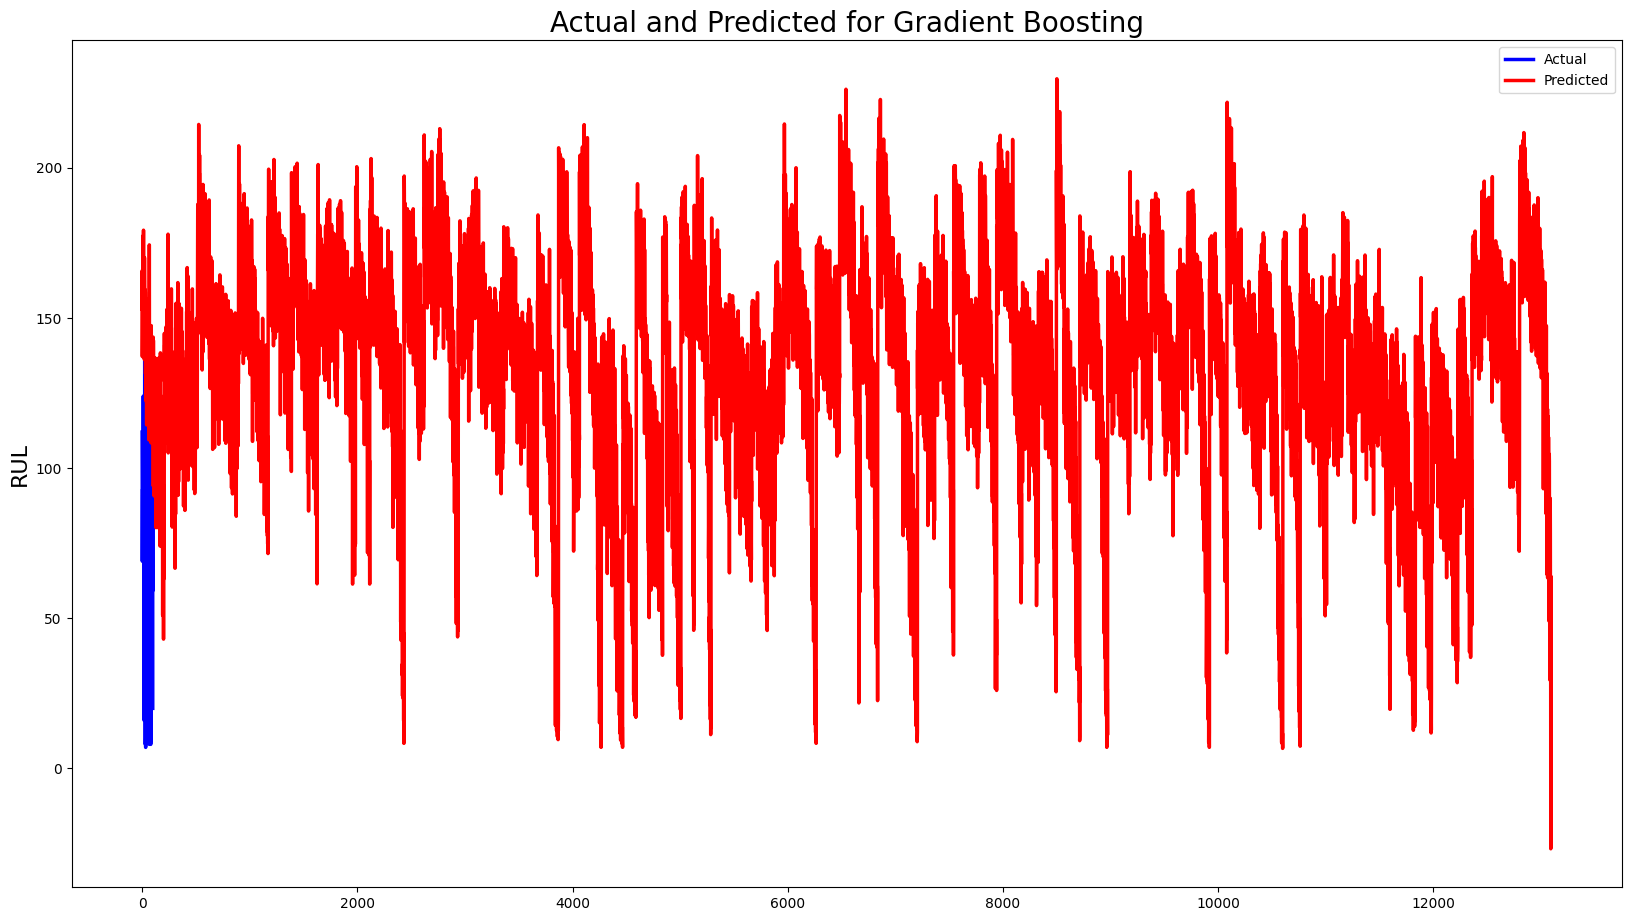

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

#Fitting
grad = GradientBoostingRegressor()
grad.fit(X_train,y_train)

#Prediction
y_pred_grad = grad.predict(X_test)

#Evalutation
mse_grad = mean_squared_error(y_test, y_pred_grad)
rmse_grad = mse_grad ** 0.5
r2_grad = abs(r2_score(y_test, y_pred_grad))
acc_grad = round(grad.score(X_train,y_train),2)*100

#Plotting
actual_vs_predicted('Gradient Boosting', y_test, y_pred_grad)

#Results
Results = Results.append(pd.DataFrame({'Model':['Gradient Boosting'],'MSE':[mse_grad],'RMSE':[rmse_grad],'R2':[r2_grad],'Accuracy':[acc_grad]}),ignore_index=True)

#### Model 8: Artificial Neural Network (ANN)

Epoch 1/75
645/645 [==============================] - 4s 5ms/step - loss: 6814.5933 - mae: 60.4361
Epoch 2/75
645/645 [==============================] - 3s 5ms/step - loss: 2062.1843 - mae: 33.5719
Epoch 3/75
645/645 [==============================] - 4s 6ms/step - loss: 2034.4757 - mae: 33.2496
Epoch 4/75
645/645 [==============================] - 4s 6ms/step - loss: 2018.1396 - mae: 33.0068
Epoch 5/75
645/645 [==============================] - 4s 6ms/step - loss: 2009.8132 - mae: 32.9498
Epoch 6/75
645/645 [==============================] - 4s 6ms/step - loss: 2005.0137 - mae: 32.8668
Epoch 7/75
645/645 [==============================] - 5s 8ms/step - loss: 1998.6494 - mae: 32.8052
Epoch 8/75
645/645 [==============================] - 3s 5ms/step - loss: 1995.2561 - mae: 32.7578
Epoch 9/75
645/645 [==============================] - 3s 5ms/step - loss: 1993.7102 - mae: 32.7105
Epoch 10/75
645/645 [==============================] - 3s 5ms/step - loss: 1984.2103 - mae: 32.6319
Epoch 11/

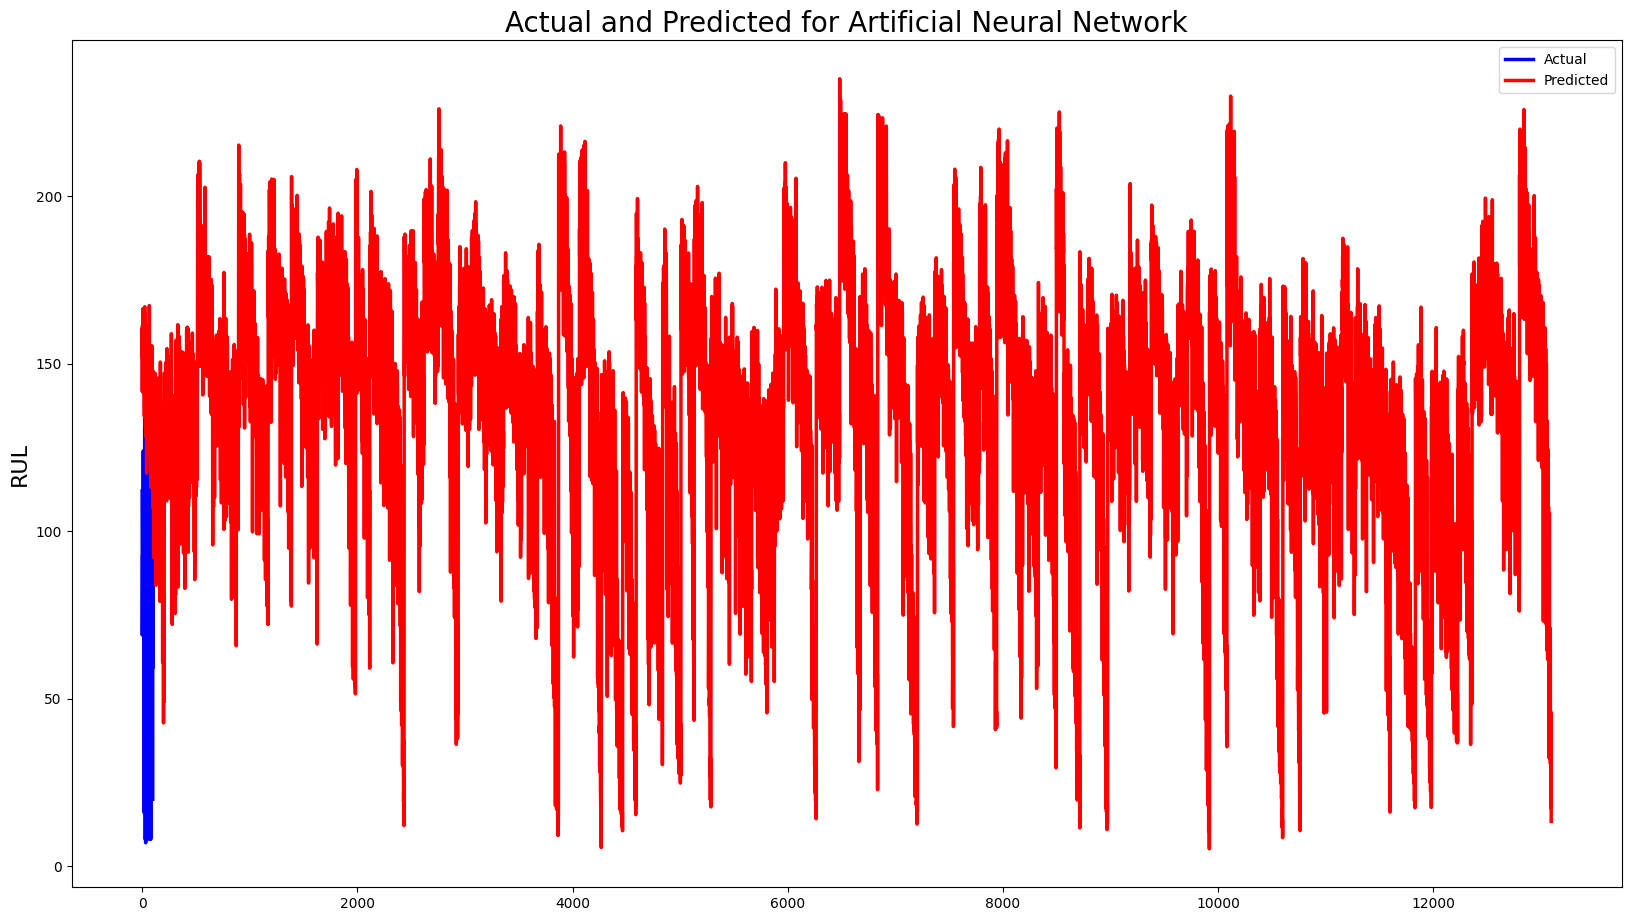

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [64]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import visualkeras

#Fitting
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=26, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 75)

#Prediction
y_pred_ann = ann.predict(X_test)

# Evaluation
mse_ann = mean_squared_error(y_test,y_pred_ann)
rmse_ann = mse_ann ** 0.5
r2_ann = abs(r2_score(y_test, y_pred_ann))
loss, accuracy = ann.evaluate(X_test, y_test)

#Plotting
actual_vs_predicted('Artificial Neural Network', y_test, y_pred_ann)
plot_model(ann, to_file='ann.png', show_shapes=True, show_layer_names=True)
visualkeras(ann, to_file='ann2.png', legend=True, spacing=15)

#Results
Results=Results.append(pd.DataFrame({'Model':['ANN'],'MSE':[mse_ann],'RMSE':[rmse_ann],'R2':[r2_ann],'Accuracy':[accuracy]}),ignore_index=True)

#### Model 9: Recurrent Neural Network (RNN)

In [53]:
X_train_deep = X_train.reshape((X_train.shape[0], 12, 1))
X_test_deep = X_test.reshape((X_test.shape[0], 12, 1))

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

Epoch 1/50
645/645 [==============================] - 23s 34ms/step - loss: 13094.5303
Epoch 2/50
645/645 [==============================] - 23s 35ms/step - loss: 9868.4590
Epoch 3/50
645/645 [==============================] - 23s 36ms/step - loss: 7732.1802
Epoch 4/50
645/645 [==============================] - 24s 37ms/step - loss: 6337.3867
Epoch 5/50
645/645 [==============================] - 24s 36ms/step - loss: 5524.8940
Epoch 6/50
645/645 [==============================] - 24s 36ms/step - loss: 5090.5649
Epoch 7/50
645/645 [==============================] - 23s 36ms/step - loss: 4911.8398
Epoch 8/50
645/645 [==============================] - 24s 37ms/step - loss: 3294.4551
Epoch 9/50
645/645 [==============================] - 27s 42ms/step - loss: 2714.8708
Epoch 10/50
645/645 [==============================] - 24s 37ms/step - loss: 2461.8335
Epoch 11/50
645/645 [==============================] - 21s 33ms/step - loss: 2354.4106
Epoch 12/50
645/645 [==============================

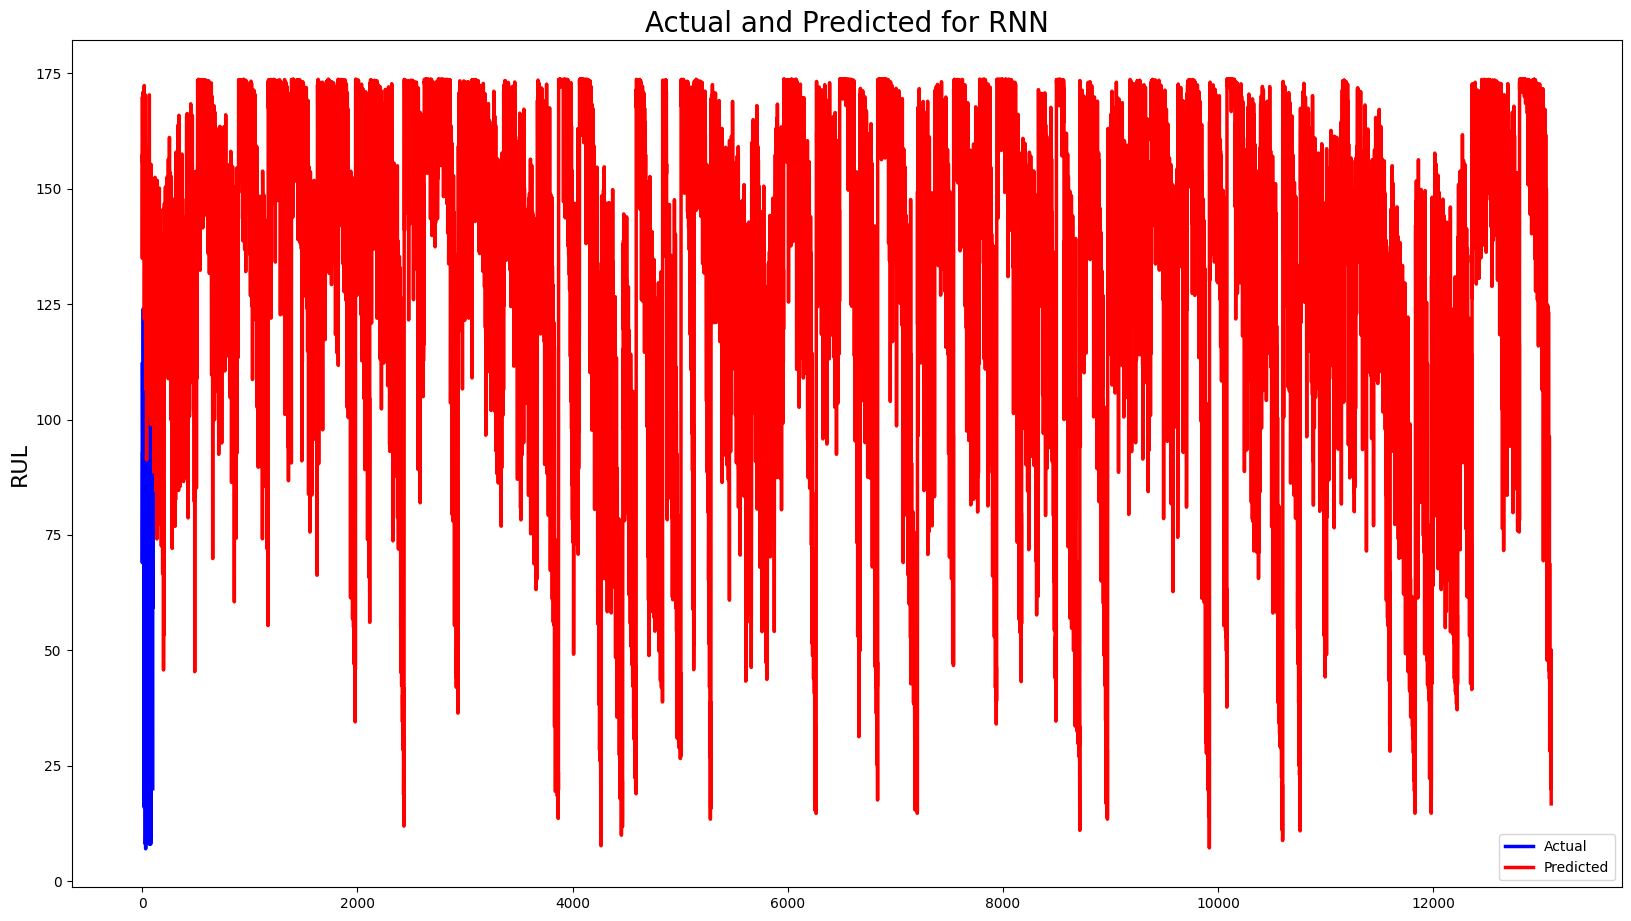

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [54]:
# Fitting
rnn = tf.keras.Sequential()
rnn.add(tf.keras.layers.SimpleRNN(64, input_shape=(12,1), return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.SimpleRNN(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.Dense(1))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

rnn.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
rnn.fit(X_train_deep, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

#Prediction
y_pred_rnn = rnn.predict(X_test_deep)

# Evaluation
loss_rnn = rnn.evaluate(X_test_deep, y_test)
accuracy_rnn = accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred_rnn,axis=1))
mse_rnn = mean_squared_error(y_test,y_pred_rnn)
rmse_rnn = mse_rnn**0.5
r2_rnn = abs(r2_score(y_test,y_pred_rnn))

#Plotting
actual_vs_predicted('RNN', y_test, y_pred_rnn)
plot_model(rnn, to_file='rnn.png', show_shapes=True, show_layer_names=True)
visualkeras(rnn, to_file='rnn2.png', legend=True, spacing=15)

#Results
Results = Results.append(pd.DataFrame({'Model':['RNN'],'MSE':[mse_rnn],'RMSE':[rmse_rnn],'R2':[r2_rnn],'Accuracy':[accuracy_rnn*100]}),ignore_index=True)

#### Model 10: Long Short Term Memory (LSTM)

Epoch 1/50
323/323 [==============================] - 13s 11ms/step - loss: 14145.5352
Epoch 2/50
323/323 [==============================] - 3s 9ms/step - loss: 12083.5693
Epoch 3/50
323/323 [==============================] - 3s 9ms/step - loss: 10508.2607
Epoch 4/50
323/323 [==============================] - 3s 9ms/step - loss: 9123.7607
Epoch 5/50
323/323 [==============================] - 3s 9ms/step - loss: 7917.5610
Epoch 6/50
323/323 [==============================] - 3s 9ms/step - loss: 6910.2363
Epoch 7/50
323/323 [==============================] - 3s 9ms/step - loss: 6053.7031
Epoch 8/50
323/323 [==============================] - 3s 9ms/step - loss: 5327.6357
Epoch 9/50
323/323 [==============================] - 3s 10ms/step - loss: 4737.2075
Epoch 10/50
323/323 [==============================] - 3s 9ms/step - loss: 4225.7266
Epoch 11/50
323/323 [==============================] - 3s 9ms/step - loss: 3797.6284
Epoch 12/50
323/323 [==============================] - 3s 9ms/step -

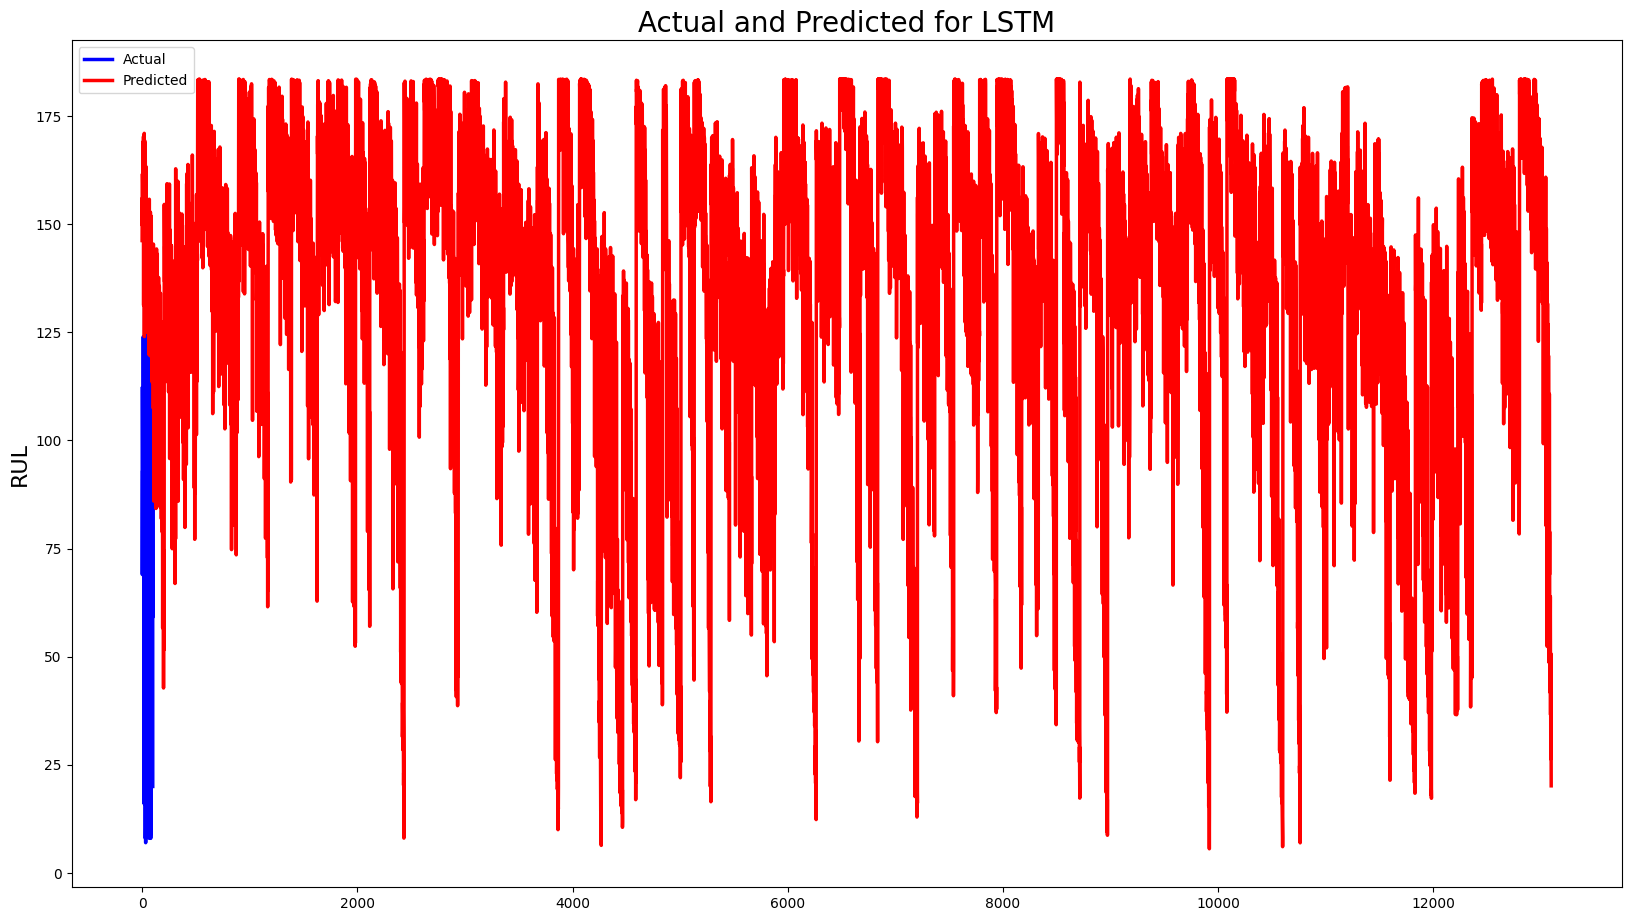

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [55]:
# Fitting
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(64, input_shape=(12,1), return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01), recurrent_regularizer=tf.keras.regularizers.l2(0.01)))
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.LSTM(32,kernel_regularizer=tf.keras.regularizers.l2(0.01),recurrent_regularizer=tf.keras.regularizers.l2(0.01)))
lstm.add(tf.keras.layers.Dropout(0.2))
lstm.add(tf.keras.layers.Dense(1))

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

lstm.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
lstm.fit(X_train_deep, y_train, epochs=50, batch_size=64, callbacks=[early_stop])

# Prediction
y_pred_lstm = lstm.predict(X_test_deep)

# Evaluation
loss_lstm = lstm.evaluate(X_test_deep, y_test)
accuracy_lstm = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_lstm, axis=1))
mse_lstm = mean_squared_error(y_test,y_pred_lstm)
rmse_lstm = mse_lstm**0.5
r2_lstm = abs(r2_score(y_test,y_pred_lstm))

#Plotting
actual_vs_predicted('LSTM', y_test, y_pred_lstm)
plot_model(lstm, to_file='lstm.png', show_shapes=True, show_layer_names=True)
visualkeras(lstm, to_file='lstm2.png', legend=True, spacing=15)

#Results
Results = Results.append(pd.DataFrame({'Model':['LSTM'],'MSE':[mse_lstm],'RMSE':[rmse_lstm],'R2':[r2_lstm],'Accuracy':[accuracy_lstm*100]}),ignore_index=True)

### Model Selection

In [56]:
Results

Model           MSE        RMSE        R2    Accuracy
0        Linear Regression   6992.424653   83.620719  3.082085   56.000000
1         Lasso Regression   6841.030207   82.710521  2.993703   56.000000
2         Ridge Regression   6992.362465   83.620347  3.082048   56.000000
3            Decision Tree  10148.274588  100.738645  4.924428  100.000000
4            Random Forest   7279.904285   85.322355  3.249911   94.000000
5  Suport Vector Regressor   5770.521591   75.963949  2.368754   57.000000
6        Gradient Boosting   6968.855677   83.479672  3.068325   60.000000
7                      ANN   5839.462180   76.416374  2.409000   63.250851
8                      RNN   6917.092285   83.169058  3.038107  100.000000
9                     LSTM   7266.253418   85.242322  3.241942  100.000000

Observation: As per our Results we can see that `Random Forest Regressor` model worked better on the training data other than the other models.

### Model Evaluation

In [57]:
print(f'The base estimator of our Random forest regressor is : {ran.base_estimator}')
print(f'The Default parameters that we have used for the model are : ')
ran.get_params()

The base estimator of our Random forest regressor is : DecisionTreeRegressor()
The Default parameters that we have used for the model are : 


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Tuning

Parameters that we are going to tune with the Random Forest model:

---

1. n_estimators -> This parameter specifies the number of trees in the forest.
2. max_depth -> This parameter controls the maximum depth of each tree in the forest.
3. min_samples_split -> This parameter sets the minimum number of samples required to split an internal node. 
4. min_samples_leaf -> This parameter sets the minimum number of samples required to be at a leaf node.
5. max_features -> This parameter specifies the maximum number of features to consider when splitting a node. 

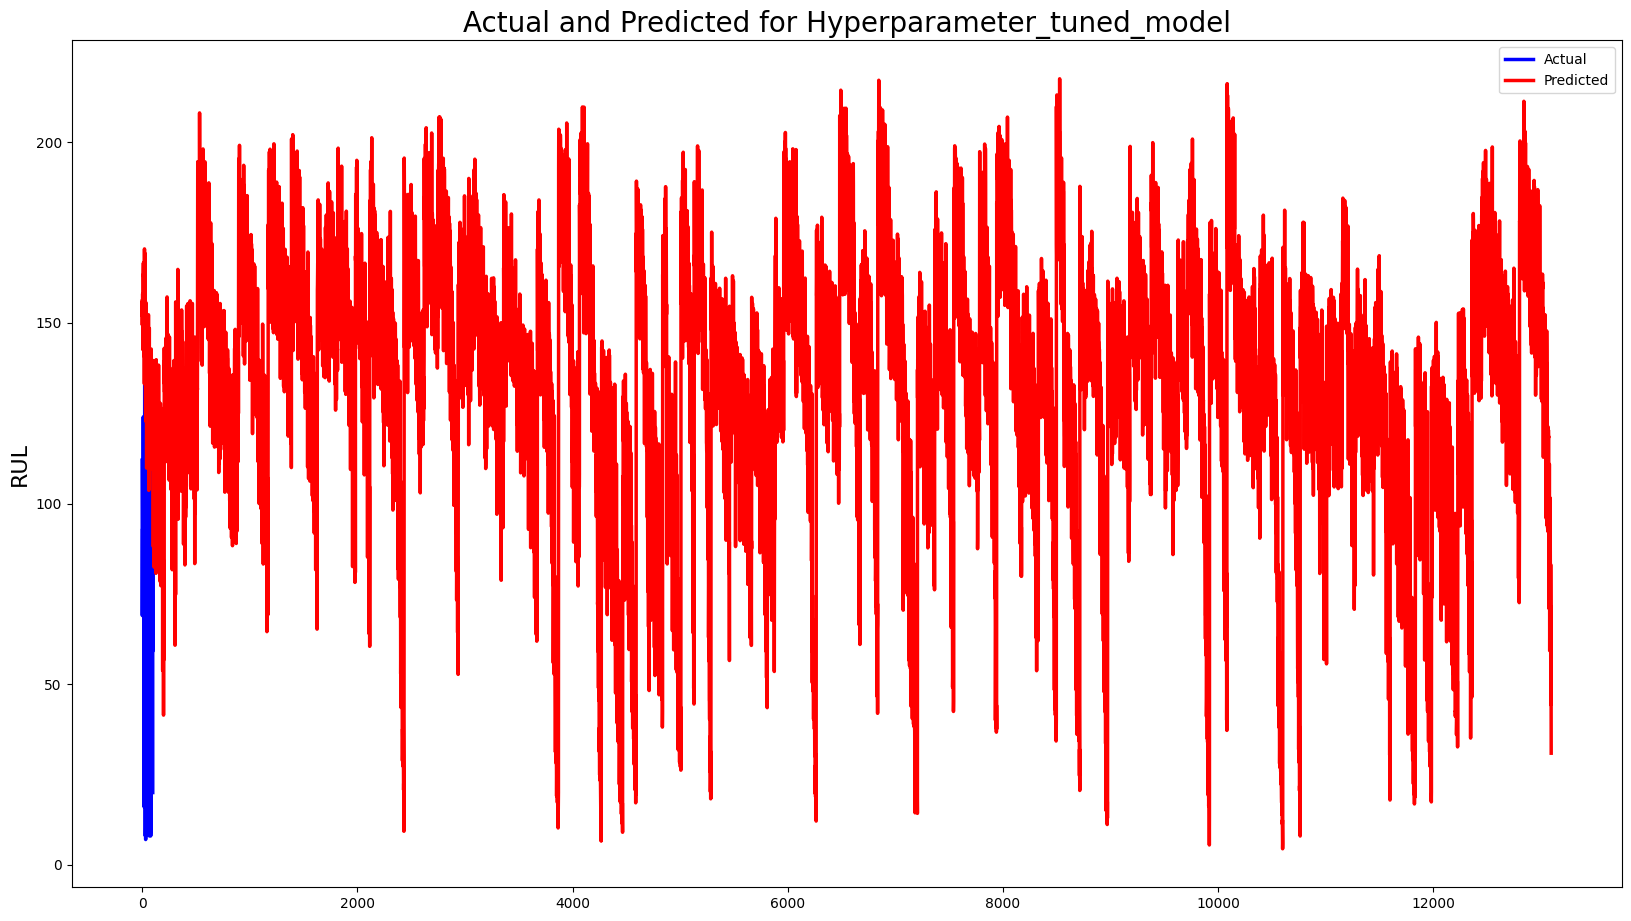

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters
n_estimators = [int(x) for x in np.linspace(10,100,10)]
max_features =['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

features = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

# Fitting
hyperparameter_tuned_model = RandomizedSearchCV(estimator=ran,param_distributions=features)
hyperparameter_tuned_model.fit(X_train,y_train)

# Prediction
y_pred_hyran = hyperparameter_tuned_model.predict(X_test)

# Evaluation
acc_hyran = round(hyperparameter_tuned_model.score(X_train,y_train),2)*100
mse_hyran = mean_squared_error(y_test, y_pred_hyran)
rmse_hyran = mse_hyran ** 0.5
r2_hyran = abs(r2_score(y_test, y_pred_hyran))

#Plotting
actual_vs_predicted('Hyperparameter_tuned_model', y_test, y_pred_hyran)

# Results
Parameter = pd.DataFrame(hyperparameter_tuned_model.get_params().values(), index=hyperparameter_tuned_model.get_params().keys(), columns=['Tuned Random Forest'])
Parameter = Parameter.append(pd.DataFrame(ran.get_params().values(), columns=['Default Random Forest'], index=ran.get_params().keys()))

Final_Results = Results[Results.Model=='Random Forest'][['Model', 'MSE', 'RMSE', 'R2']]
Final_Results = Final_Results.append(pd.DataFrame({'Model':['Hyperparameter Tuned Random Forest '],'MSE':[mse_hyran],'RMSE':[rmse_hyran],'R2':[r2_hyran]}),ignore_index=True).set_index('Model')

In [59]:
Parameter

Tuned Random Forest  \
cv                                                                                None   
error_score                                                                        NaN   
estimator__bootstrap                                                              True   
estimator__ccp_alpha                                                               0.0   
estimator__criterion                                                     squared_error   
estimator__max_depth                                                              None   
estimator__max_features                                                           auto   
estimator__max_leaf_nodes                                                         None   
estimator__max_samples                                                            None   
estimator__min_impurity_decrease                                                   0.0   
estimator__min_samples_leaf                                                          1   
estimator__min_samples_split                                                         2   
estimator__min_weight_fraction_leaf                                                0.0   
estimator__n_estimators                                                            100   
estimator__n_jobs                                                                 None   
estimator__oob_score                                                             False   
estimator__random_state                                                           None   
estimator__verbose                                                                   0   
estimator__warm_start                                                            False   
estimator                            (DecisionTreeRegressor(max_features='auto', ra...   
n_iter                                                                              10   
n_jobs                                                                            None   
param_distributions                  {'n_estimators': [10, 20, 30, 40, 50, 60, 70, ...   
pre_dispatch                                                                  2*n_jobs   
random_state                                                                      None   
refit                                                                             True   
return_train_score                                                               False   
scoring                                                                           None   
verbose                                                                              0   
bootstrap                                                                          NaN   
ccp_alpha                                                                          NaN   
criterion                                                                          NaN   
max_depth                                                                          NaN   
max_features                                                                       NaN   
max_leaf_nodes                                                                     NaN   
max_samples                                                                        NaN   
min_impurity_decrease                                                              NaN   
min_samples_leaf                                                                   NaN   
min_samples_split                                                                  NaN   
min_weight_fraction_leaf                                                           NaN   
n_estimators                                                                       NaN   
n_jobs                                                                             NaN   
oob_score                                                                          NaN   
random_state                                                                       NaN   
verbose          

In [60]:
print('The parameters which are considered to be the best for the model are : ')
hyperparameter_tuned_model.best_params_

The parameters which are considered to be the best for the model are : 


{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 25}

In [61]:
Final_Results

MSE       RMSE        R2
Model                                                                
Random Forest                        7279.904285  85.322355  3.249911
Hyperparameter Tuned Random Forest   6937.651329  83.292565  3.050109

#### Comparing the prediction of our hyperparameter tuned model

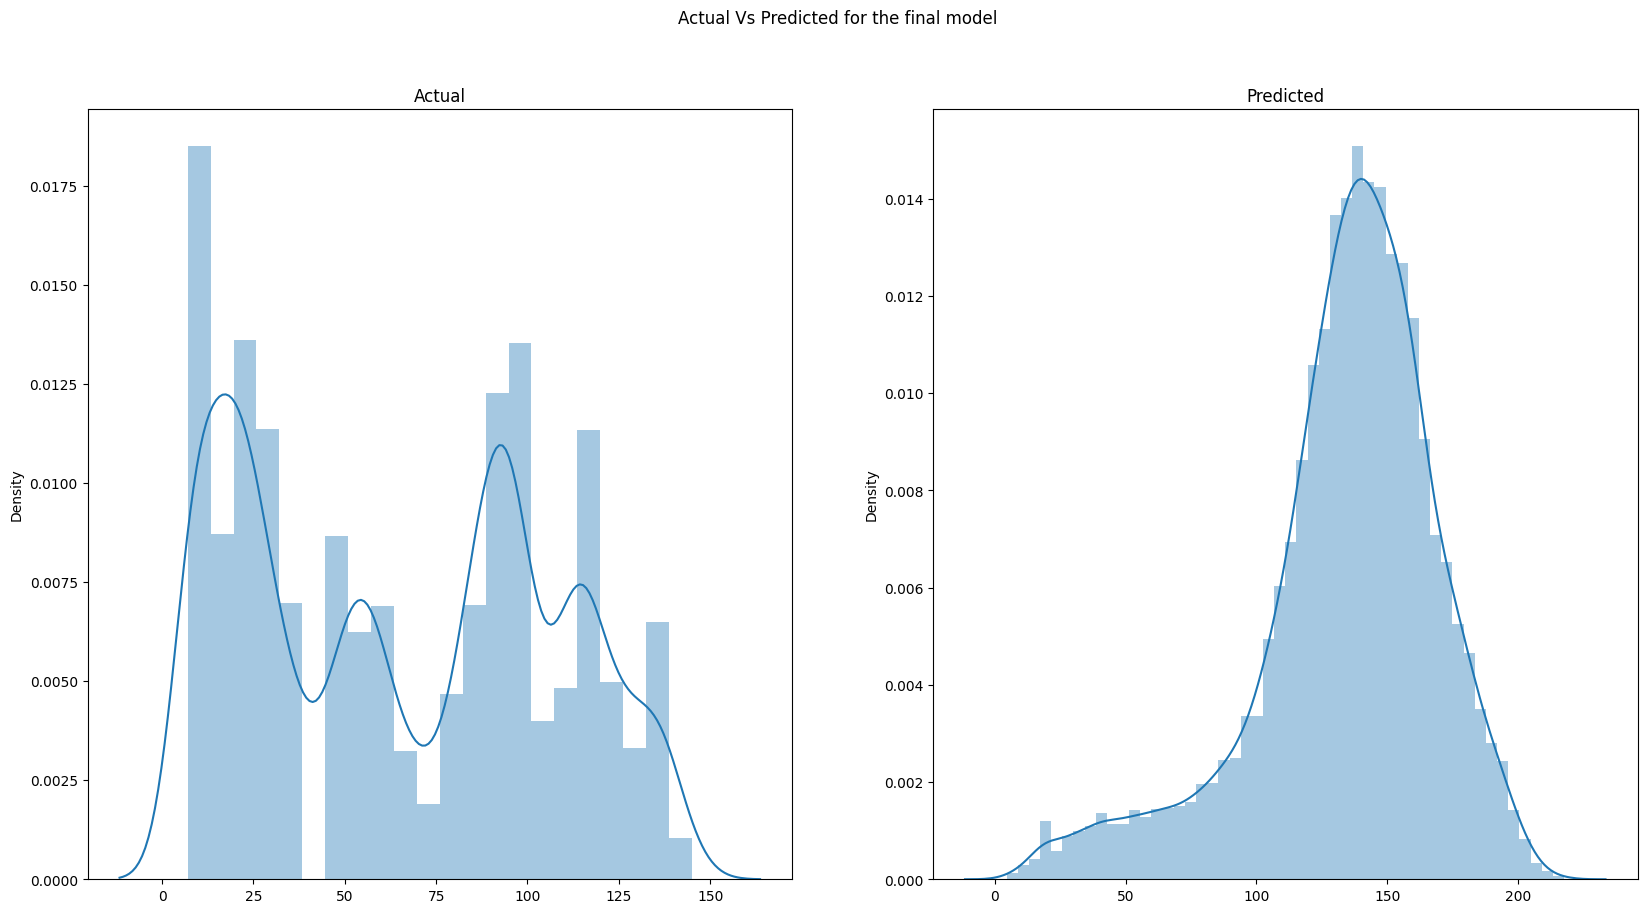

In [62]:
plt.figure(figsize=(20,10))
plt.suptitle('Actual Vs Predicted for the final model')
plt.subplot(1,2,1)
plt.title('Actual')
sns.distplot(y_test)
plt.subplot(1,2,2)
plt.title('Predicted')
sns.distplot(y_pred_hyran)
plt.savefig('Actual VS Predicted Dist Plot final model.png')
plt.show()

### Model Dumping as pickle file

In [63]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(hyperparameter_tuned_model, file)

model = open('final_model.pkl','rb')
hyperparameter_random_forest = pickle.load(model)